## Setup

In [5]:
!pip install  sentence_transformers
!pip install  pandas
!pip install  numpy
!pip install  scikit-learn
!pip install  matplotlib
!pip install  openai
!pip install  tensorflow codecarbon sentence_transformers pandas scikit-learn

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached MarkupSafe-2.1.5-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl.metadata (34 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/199.4 MB 6.3 MB/s eta 0:00:32
    ----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.27.0 requires prompt-toolkit<3.1.0,>=3.0.41, but you have prompt-toolkit 3.0.36 which is incompatible.


In [6]:
!python.exe  -m pip install --upgrade pip

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from sklearn.manifold import TSNE
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate
from sentence_transformers import SentenceTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from codecarbon import EmissionsTracker
import pandas as pd
import numpy as np
import pickle
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.autonotebook import tqdm, trange

c:\Users\nikhi\Desktop\GITHUB PROJECTS\MedCruncher\.venv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [14]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 23.6 MB/s eta 0:00:00


In [2]:
# LOAD EMBEDDINGS

with open("IU_embeddings.pkl", "rb") as file:
    X = pickle.load(file)


In [3]:
# LOAD EMBEDDINGS

with open("MIMIC_embeddings.pkl", "rb") as file:
    X_MIMIC = pickle.load(file)


In [4]:
#LOAD LABELS

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

df = pd.read_csv(file_path)
y = df[label_columns]

In [5]:
#EMBEDDING FUNCTION

def MedcrunchR_embedding(file_path, report_column, model_name):

    embedding_model = SentenceTransformer(model_name)
    df = pd.read_csv(file_path)
    allReports = df[report_column]
    allResponses = [];

    for report in allReports:
      response = embedding_model.encode(report)
      allResponses.append(response)



    return np.vstack(allResponses)


## Database Analytics

In [14]:
file_path='IU-GroundTruth.csv'
df=pd.read_csv(file_path)
print(len(df))
print(len(df.columns))
print((df.columns))

3665
19
Index(['ACCID', 'Report ID', 'Age', 'Sex', 'REPORT', 'No Finding',
       'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity',
       'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax',
       'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'],
      dtype='object')


In [15]:
file_path='MIMIC-GroundTruth2.csv'
df=pd.read_csv(file_path)
print(len(df))
print(len(df.columns))
print((df.columns))

692
26
Index(['ACCID', 'subject_id', 'sex', 'age', 'ethnicity', 'insurance',
       'grouped_age', 'group_no', 'study_id', 'GT', 'GT_Maybe', 'REPORT',
       'No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion',
       'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Device'],
      dtype='object')


## Generating Embeddings

In [ ]:
def MedcrunchR_embedding(file_path, report_column, model_name):

    embedding_model = SentenceTransformer(model_name)
    df = pd.read_csv(file_path)
    allReports = df[report_column]
    allResponses = [];

    for report in allReports:
      response = embedding_model.encode(report)
      allResponses.append(response)



    return np.vstack(allResponses)






Load and validate the Graph

In [ ]:
# IU EMBEDDINGS

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="all-MiniLM-L6-v2"
X = MedcrunchR_embedding(file_path, report_column, model_name)



In [ ]:
# MIMIC EMBEDDINGS
file_path = "MIMIC-GroundTruth2.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="all-MiniLM-L6-v2"

X_MIMIC = MedcrunchR_embedding(file_path, report_column, model_name)



In [ ]:
# STORING EMBEDDINGS

with open("MIMIC_embeddings.pkl", "wb") as file:
    pickle.dump(X_MIMIC, file)


In [ ]:

label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
allAcc = []
allScores = []
df = pd.read_csv(file_path)

# This is an example; the goal would be implement a MLP (multi-layer perceptron)
# to classify the embeddings (hint: use sigmoid activations instead of softmax)
# In addition, implement codecarbon to track the carbon usage.
# using mlp allows us to expand this project to an FL project
# (we will discuss the big picture later)


In [20]:
# STORING EMBEDDINGS

with open("IU_embeddings.pkl", "wb") as file:
    pickle.dump(X, file)


## Text Cleaning Embeddings

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
# Load different sentence transfomer models here (Try atleast)
#model = SentenceTransformer("all-MiniLM-L6-v2")
embedding_model = SentenceTransformer("all-mpnet-base-v2")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [ ]:
def MedcrunchR_embedding(file_path, report_column, label_column):

    df = pd.read_csv(file_path)
    allReports = df[report_column]
    allResponses = [];

    for report in allReports:
      cleaned_report = clean_text(report)
      response = embedding_model.encode(cleaned_report)
      allResponses.append(response)


    return np.vstack(allResponses)

In [ ]:
# IU EMBEDDINGS

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'

X = MedcrunchR_embedding(file_path, report_column, label_column)



In [ ]:
# MIMIC EMBEDDINGS
file_path = "MIMIC-GroundTruth2.csv"
report_column = 'REPORT'
label_column = 'No Finding'

X_MIMIC = MedcrunchR_embedding(file_path, report_column, label_column)



## Random Forest Basic

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for column in label_columns:
    y = df[column].values
    scores = cross_validate(clf, X, y, scoring=scoring, cv=5)
    allScores.append(scores)
    allAcc.append(np.mean(scores['test_accuracy']))
    print(column,np.mean(scores['test_accuracy']))

No Finding 0.8521145975443384
Enlarged Cardiom. 0.9102319236016371
Cardiomegaly 0.9219645293315143
Lung Lesion 0.8586630286493862
Lung Opacity 0.8687585266030012


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Edema 0.9879945429740792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Consolidation 0.992905866302865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Pneumonia 0.9901773533424283
Atelectasis 0.9290586630286495


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Pneumothorax 0.9931787175989086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pleural Effusion 0.9609822646657571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Pleural Other 0.9803547066848568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fracture 0.976261937244202
Support Devices 0.9276944065484312


## MLP Basic

In [ ]:
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

df = pd.read_csv(file_path)
y = df[label_columns]

In [ ]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print(X_train.shape)
print(y_train.shape)

(2932, 768)
(2932, 14)


In [ ]:

#CARBON TRACKER INITIALISED

#tracker = EmissionsTracker()
#tracker.start()
#emissions = tracker.stop()
#print(emissions)

In [ ]:
results = {}

for column in label_columns:
  y_train_single_label = y_train[column].values
  y_test_single_label = y_test[column].values

  #DEFINE MLP MODEL

  model = Sequential()
  model.add(Dropout(0.5, input_shape=(X_train.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  #MODEL COMPILE
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

  #TRAIN MODEL

  history = model.fit(X_train, y_train_single_label, epochs=300, batch_size=32)


  #MODEL EVAL
  print(column)
  loss, accuracy = model.evaluate(X_test, y_test_single_label, verbose=0)

  #STORE RESULT
  results[column] = {'loss': loss, 'accuracy': accuracy}
  print(f"Label: {column}, Loss: {loss}, Accuracy: {accuracy}")

Streaming output truncated to the last 5000 lines.
Epoch 210/300
92/92 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 0.9884
Epoch 211/300
92/92 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9884
Epoch 212/300
92/92 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9884
Epoch 213/300
92/92 [==============================] - 1s 5ms/step - loss: 0.0553 - accuracy: 0.9884
Epoch 214/300
92/92 [==============================] - 0s 5ms/step - loss: 0.0558 - accuracy: 0.9884
Epoch 215/300
92/92 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9884
Epoch 216/300
92/92 [==============================] - 0s 4ms/step - loss: 0.0556 - accuracy: 0.9884
Epoch 217/300
92/92 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9884
Epoch 218/300
92/92 [==============================] - 0s 5ms/step - loss: 0.0549 - accuracy: 0.9884
Epoch 219/300
92/92 [===================

In [ ]:
results_df = pd.DataFrame(results).transpose()
print(results_df)

                       loss  accuracy
No Finding         0.320392  0.874488
Enlarged Cardiom.  0.195391  0.929059
Cardiomegaly       0.145023  0.946794
Lung Lesion        0.292097  0.878581
Lung Opacity       0.283876  0.882674
Edema              0.061001  0.986357
Consolidation      0.029522  0.994543
Pneumonia          0.034041  0.991814
Atelectasis        0.129049  0.945430
Pneumothorax       0.012090  0.998636
Pleural Effusion   0.079664  0.972715
Pleural Other      0.083715  0.980900
Fracture           0.066825  0.976808
Support Devices    0.179787  0.931787


In [ ]:
average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average Accuracy: {average_accuracy:.4f}")

## K-Fold CV for MLP

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import GlorotUniform, HeUniform

In [ ]:
#K FOLD SET UP

kf = KFold(n_splits=5, shuffle=True, random_state=55)


In [ ]:
def cross_validate_mlp(dropout_rate, activation, learning_rate, batch_size, epochs, optimizer, regularization, initialization, y):
    accuracy_per_fold = []
    loss_per_fold = []

    for train_index, val_index in kf.split(X):
        #VALIDATION SPLIT
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]


        #MLP DEFINITION
        model = Sequential()
        model.add(Dropout(dropout_rate))
        model.add(Dense(64, activation=activation, kernel_initializer=initialization))

        if regularization == 'l2':
            from tensorflow.keras.regularizers import l2
            model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
        else:
            model.add(Dense(1, activation='sigmoid'))

        #MODEL COMPILE
        if optimizer == 'sgd':
            opt = SGD(learning_rate=learning_rate)
        elif optimizer == 'adam':
            opt = Adam(learning_rate=learning_rate)

        model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

        #TRAININF
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

        #EVALUATION
        loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

        #STORE RESULT
        accuracy_per_fold.append(accuracy)
        loss_per_fold.append(loss)

    #CALC AVERAGES
    average_accuracy = np.mean(accuracy_per_fold)
    average_loss = np.mean(loss_per_fold)

    return average_accuracy, average_loss

In [ ]:
#TEST DROPOUT

dropout_rates = [0.2, 0.3, 0.4, 0.5]
results = {}

for dropout_rate in dropout_rates:
  for column in label_columns:
      y = df[column].values
      avg_accuracy, avg_loss = cross_validate_mlp(
          dropout_rate=dropout_rate,
          activation='relu',
          learning_rate=0.1,
          batch_size=32,
          epochs=100,
          optimizer='sgd',
          regularization=None,
          initialization='glorot_uniform',
          y=y)
      results[dropout_rate] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for dropout_rate, metrics in results.items():
  print(f'Dropout Rate: {dropout_rate}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


KeyboardInterrupt: 

In [ ]:

#ACTIVCATION FUNCTION

activations = ['relu', 'tanh', 'sigmoid']
results = {}

for activation in activations:
  for column in label_columns:
    y = df[column].values
    avg_accuracy, avg_loss = cross_validate_mlp(
        dropout_rate=0.5,
        activation=activation,
        learning_rate=0.1,
        batch_size=32,
        epochs=100,
        optimizer='sgd',
        regularization=None,
        initialization='glorot_uniform',
        y=y
    )
    results[activation] = {'accuracy': avg_accuracy, 'loss': avg_loss}

  #RESULT
for activation, metrics in results.items():
  print(f'Activation Function: {activation}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


Activation Function: relu
Average Accuracy: 0.9416098237037659
Average Loss: 0.14897332489490508

Activation Function: tanh
Average Accuracy: 0.9435197830200195
Average Loss: 0.14413636922836304

Activation Function: sigmoid
Average Accuracy: 0.9274215579032898
Average Loss: 0.19564062654972075



In [ ]:
#LEARNING RATE

learning_rates = [0.01, 0.001, 0.1]
results = {}

for learning_rate in learning_rates:
  for column in label_columns:
      y = df[column].values
      avg_accuracy, avg_loss = cross_validate_mlp(
          dropout_rate=0.5,
          activation='relu',
          learning_rate=learning_rate,
          batch_size=32,
          epochs=100,
          optimizer='sgd',
          regularization=None,
          initialization='glorot_uniform',
          y=y
      )
      results[learning_rate] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for learning_rate, metrics in results.items():
  print(f'Learning Rate: {learning_rate}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


Learning Rate: 0.01
Average Accuracy: 0.9219645261764526
Average Loss: 0.23424335420131684

Learning Rate: 0.001
Average Accuracy: 0.9219645261764526
Average Loss: 0.2693134665489197

Learning Rate: 0.1
Average Accuracy: 0.9402455687522888
Average Loss: 0.1538815274834633



In [ ]:
#BATCH SIZE

batch_sizes = [32, 64, 100]
results = {}

for batch_size in batch_sizes:
  for column in label_columns:
    y = df[column].values
    avg_accuracy, avg_loss = cross_validate_mlp(
        dropout_rate=0.5,
        activation='relu',
        learning_rate=0.1,
        batch_size=batch_size,
        epochs=100,
        optimizer='sgd',
        regularization=None,
        initialization='glorot_uniform',
        y=y
    )
    results[batch_size] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for batch_size, metrics in results.items():
  print(f'Batch Size: {batch_size}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


Batch Size: 32
Average Accuracy: 0.9405184149742126
Average Loss: 0.14984803199768065

Batch Size: 64
Average Accuracy: 0.9369713544845581
Average Loss: 0.15831069946289061

Batch Size: 100
Average Accuracy: 0.9347885489463806
Average Loss: 0.17147665619850158



In [ ]:
#EPOCHS

epoch_values = [100, 200, 10, 50]
results = {}

for epochs in epoch_values:
  for column in label_columns:
      y = df[column].values
      avg_accuracy, avg_loss = cross_validate_mlp(
          dropout_rate=0.5,
          activation='relu',
          learning_rate=0.1,
          batch_size=32,
          epochs=epochs,
          optimizer='sgd',
          regularization=None,
          initialization='glorot_uniform',
          y=y
      )
      results[epochs] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for epochs, metrics in results.items():
  print(f'Epochs: {epochs}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


KeyboardInterrupt: 

In [ ]:
#OPTIMIZER

optimizers = ['sgd', 'adam']
results = {}

for optimizer in optimizers:
  for column in label_columns:
      y = df[column].values
      avg_accuracy, avg_loss = cross_validate_mlp(
          dropout_rate=0.5,
          activation='relu',
          learning_rate=0.1,
          batch_size=32,
          epochs=100,
          optimizer=optimizer,
          regularization=None,
          initialization='glorot_uniform',
          y=y
      )
      results[optimizer] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for optimizer, metrics in results.items():
  print(f'Optimizer: {optimizer}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


In [ ]:
#REGULARIZATION

regularizations = [None, 'l2']
results = {}

for regularization in regularizations:
  for column in label_columns:
      y = df[column].values
      avg_accuracy, avg_loss = cross_validate_mlp(
          dropout_rate=0.5,
          activation='relu',
          learning_rate=0.1,
          batch_size=32,
          epochs=100,
          optimizer='sgd',
          regularization=regularization,
          initialization='glorot_uniform',
          y=y
      )
      results[regularization] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for regularization, metrics in results.items():
  print(f'Regularization: {regularization}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


In [ ]:
#WEIGHT INITILIZATIONS

initializations = ['glorot_uniform', 'he_uniform']
results = {}

for initialization in initializations:
  for column in label_columns:
      y = df[column].values
      avg_accuracy, avg_loss = cross_validate_mlp(
          dropout_rate=0.5,
          activation='relu',
          learning_rate=0.1,
          batch_size=32,
          epochs=100,
          optimizer='sgd',
          regularization=None,
          initialization=initialization,
          y=y
      )
      results[initialization] = {'accuracy': avg_accuracy, 'loss': avg_loss}

#RESULT
for initialization, metrics in results.items():
  print(f'Initialization: {initialization}')
  print(f'Average Accuracy: {metrics["accuracy"]}')
  print(f'Average Loss: {metrics["loss"]}\n')


### Ideal Parameters
- Dropout:0.5, 0.3
- Activation Function: tanh, relu
- Learning Rate: 0.1
- Batch Size: 32, 100
- Epoch: 200
- Optimizer: sgd
- Regularisation: None


## K-Fold CV for Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#K FOLD SET UP

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

splits = list(kf.split(X))

In [ ]:
def cross_validate_rf(n_estimators, max_depth, min_samples_split, min_samples_leaf, splits):
    accuracy_per_fold = []

    for train_index, val_index in splits:
        #DATA SPLIT
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        #DEFINE MODEL
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        #TRAIN MODEL
        model.fit(X_train, y_train)

        #EVALUATION
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_per_fold.append(accuracy)

    average_accuracy = np.mean(accuracy_per_fold)
    return average_accuracy

In [ ]:
n_estimators_list = [10, 50, 100, 200, 300, 400]
results = {}

for n_estimators in n_estimators_list:
  accuracies=[]
  for column in label_columns:
    y = df[column].values
    accuracy = cross_validate_rf(
        n_estimators=n_estimators,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        splits=splits
    )
    accuracies.append(accuracy)

  results[n_estimators] = {'accuracy': np.mean(accuracies)}

for n_estimators, metrics in results.items():
    print(f'Number of Estimators: {n_estimators}')
    print(f'Average Accuracy: {metrics["accuracy"]}\n')


Number of Estimators: 10
Average Accuracy: 0.45784447476125517

Number of Estimators: 50
Average Accuracy: 0.5025920873124148

Number of Estimators: 100
Average Accuracy: 0.5028649386084585

Number of Estimators: 200
Average Accuracy: 0.5094133697135061

Number of Estimators: 300
Average Accuracy: 0.5121418826739428

Number of Estimators: 400
Average Accuracy: 0.5129604365620737



In [ ]:
max_depth_list = [10, 20, 30, 40, 50 , None ]
results = {}

for max_depth_item in max_depth_list:
    accuracies=[]
    for column in label_columns:
        y = df[column].values
        avg_accuracy = cross_validate_rf(
            n_estimators=300,
            max_depth=max_depth_item,
            min_samples_split=2,
            min_samples_leaf=1,
            splits=splits
        )
        accuracies.append(accuracy)
    results[max_depth_item] = {'accuracy': np.mean(accuracies)}

for n_estimators, metrics in results.items():
    print(f'Max Depth: {n_estimators}')
    print(f'Average Accuracy: {metrics["accuracy"]}\n')


Max Depth: 10
Average Accuracy: 0.5075034106412006

Max Depth: 20
Average Accuracy: 0.5159618008185539

Max Depth: 30
Average Accuracy: 0.5124147339699864

Max Depth: 40
Average Accuracy: 0.51268758526603

Max Depth: 50
Average Accuracy: 0.5121418826739428

Max Depth: None
Average Accuracy: 0.5121418826739428



In [ ]:
min_samples_split_list = [2, 5, 10, 20]
results = {}

for min_samples_split in min_samples_split_list:
    avg_accuracy = cross_validate_rf(
        n_estimators=300,
        max_depth=None,
        min_samples_split=min_samples_split,
        min_samples_leaf=1,
        splits=splits
    )
    results[min_samples_split] = {'accuracy': avg_accuracy}

# Print results for min samples split
for min_samples_split, metrics in results.items():
    print(f'Min Samples Split: {min_samples_split}')
    print(f'Average Accuracy: {metrics["accuracy"]}\n')


Min Samples Split: 2
Average Accuracy: 0.5121418826739428

Min Samples Split: 5
Average Accuracy: 0.5088676671214187

Min Samples Split: 10
Average Accuracy: 0.5058663028649386

Min Samples Split: 20
Average Accuracy: 0.497680763983629



In [ ]:
min_samples_leaf_list = [1, 2, 4, 6, 8, 10]
results = {}

for min_samples_leaf in min_samples_leaf_list:
    avg_accuracy = cross_validate_rf(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=min_samples_leaf,
        splits=splits
    )
    results[min_samples_leaf] = {'accuracy': avg_accuracy}

# Print results for min samples leaf
for min_samples_leaf, metrics in results.items():
    print(f'Min Samples Leaf: {min_samples_leaf}')
    print(f'Average Accuracy: {metrics["accuracy"]}\n')


Min Samples Leaf: 1
Average Accuracy: 0.5121418826739428

Min Samples Leaf: 2
Average Accuracy: 0.513506139154161

Min Samples Leaf: 4
Average Accuracy: 0.5105047748976808

Min Samples Leaf: 6
Average Accuracy: 0.5050477489768077

Min Samples Leaf: 8
Average Accuracy: 0.5006821282401092

Min Samples Leaf: 10
Average Accuracy: 0.49849931787176



### Ideal Parameters

- Number of Estimators: 300
- Max Depth: 20
- Min Samples Split: 2
- Min Sample Leaf: 2

## Training and Testing Models on IU-GroundTruth

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import GlorotUniform, HeUniform

In [ ]:
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

df = pd.read_csv(file_path)
y = df[label_columns]

In [ ]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [ ]:
# MLP TRAINING
mlp_results={}

for column in label_columns:
  y_train_single_label = y_train[column].values
  y_test_single_label = y_test[column].values

  #DESCRIBE MODEL
  model = Sequential()
  model.add(Dropout(0.5, input_shape=(X_train.shape[1],)))#0.5 or 0.3
  model.add(Dense(64, activation='tanh'))#tanh or relu
  model.add(Dense(1, activation='sigmoid'))

  #MODEL COMPILE
  opt = SGD(learning_rate=0.1)

  model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

  #TRAINING
  history = model.fit(X_train, y_train_single_label, epochs=200, batch_size=32 , verbose=0)#batch size-32 or 100

  #EVALUATION
  loss, accuracy = model.evaluate(X_test, y_test_single_label, verbose=0)
  mlp_results[column] = {'loss': loss, 'accuracy': accuracy, 'model': model}
  print(f"Label: {column}, Loss: {loss}, Accuracy: {accuracy}")

Label: No Finding, Loss: 0.2937195301055908, Accuracy: 0.8963165283203125
Label: Enlarged Cardiom., Loss: 0.1751614660024643, Accuracy: 0.944065511226654
Label: Cardiomegaly, Loss: 0.14210233092308044, Accuracy: 0.9427012205123901
Label: Lung Lesion, Loss: 0.25086742639541626, Accuracy: 0.9140518307685852
Label: Lung Opacity, Loss: 0.23771238327026367, Accuracy: 0.9181445837020874
Label: Edema, Loss: 0.024663466960191727, Accuracy: 0.9890859723091125
Label: Consolidation, Loss: 0.0378984659910202, Accuracy: 0.9918144345283508
Label: Pneumonia, Loss: 0.033987920731306076, Accuracy: 0.9877216815948486
Label: Atelectasis, Loss: 0.11049722880125046, Accuracy: 0.9590722918510437
Label: Pneumothorax, Loss: 0.014814885333180428, Accuracy: 0.9931787252426147
Label: Pleural Effusion, Loss: 0.12896525859832764, Accuracy: 0.9549795389175415
Label: Pleural Other, Loss: 0.07732989639043808, Accuracy: 0.9795361757278442
Label: Fracture, Loss: 0.0550176240503788, Accuracy: 0.9754433631896973
Label: S

In [ ]:
#RANDOM FOREST TRAINING

n_estimators = 300
max_depth = 20
min_samples_split = 2
min_samples_leaf = 2

rf_results={}



for column in label_columns:
  y_train_single_label = y_train[column].values
  y_test_single_label = y_test[column].values

  #DEFINE MODEL
  model = RandomForestClassifier(
      n_estimators=n_estimators,
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      min_samples_leaf=min_samples_leaf,
      random_state=42
  )

  #TRAIN MODEL
  model.fit(X_train, y_train_single_label)

  #EVALUATION
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test_single_label, y_pred)

  rf_results[column] = {'accuracy': accuracy, 'model': model}
  print(f"Label: {column}, Accuracy: {accuracy}")

Label: No Finding, Accuracy: 0.8540245566166439
Label: Enlarged Cardiom., Accuracy: 0.8894952251023193
Label: Cardiomegaly, Accuracy: 0.9017735334242838
Label: Lung Lesion, Accuracy: 0.8485675306957708
Label: Lung Opacity, Accuracy: 0.8376534788540245
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9249658935879945
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9454297407912687
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.922237380627558


## Testing on MIMIC Data

In [ ]:
test_path = "MIMIC-GroundTruth2.csv"
report_column = 'REPORT'
label_column = 'No Finding'
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture']
#NOTE: SUPPORT DEVICES DOESNT EXIST IN MIMIC DATASET
df = pd.read_csv(test_path)
y = df[label_columns]

In [ ]:
# MLP TESTING
mlp_test_results={}

for column in label_columns:
  y_label=y[column].values
  model=mlp_results[column]['model']
  #TESTING
  loss, accuracy = model.evaluate(X_MIMIC, y_label, verbose=0)
  mlp_test_results[column] = {'loss': loss, 'accuracy': accuracy}
  print(f"Label: {column}, Loss: {loss}, Accuracy: {accuracy}")

Label: No Finding, Loss: 0.8035879135131836, Accuracy: 0.6647399067878723
Label: Enlarged Cardiom., Loss: 0.22743207216262817, Accuracy: 0.9190751314163208
Label: Cardiomegaly, Loss: 0.3337165415287018, Accuracy: 0.8916184902191162
Label: Lung Lesion, Loss: 0.7869850993156433, Accuracy: 0.6531791687011719
Label: Lung Opacity, Loss: 0.5388299822807312, Accuracy: 0.7514451146125793
Label: Edema, Loss: 0.34037286043167114, Accuracy: 0.9248554706573486
Label: Consolidation, Loss: 0.12057481706142426, Accuracy: 0.9725433588027954
Label: Pneumonia, Loss: 0.056824371218681335, Accuracy: 0.9826589822769165
Label: Atelectasis, Loss: 0.27879470586776733, Accuracy: 0.884393036365509
Label: Pneumothorax, Loss: 0.07073325663805008, Accuracy: 0.9710982441902161
Label: Pleural Effusion, Loss: 0.28927454352378845, Accuracy: 0.884393036365509
Label: Pleural Other, Loss: 0.026493582874536514, Accuracy: 0.9942196607589722
Label: Fracture, Loss: 0.06815820187330246, Accuracy: 0.9754335284233093


In [ ]:
#RANDOM FOREST TESTING

rf_test_results={}

for column in label_columns:
  y_label=y[column].values
  model=rf_results[column]['model']
  #EVALUATION
  y_pred = model.predict(X_MIMIC)
  accuracy = accuracy_score(y_label, y_pred)

  rf_test_results[column] = {'accuracy': accuracy}
  print(f"Label: {column}, Accuracy: {accuracy}")

Label: No Finding, Accuracy: 0.5534682080924855
Label: Enlarged Cardiom., Accuracy: 0.953757225433526
Label: Cardiomegaly, Accuracy: 0.888728323699422
Label: Lung Lesion, Accuracy: 0.7803468208092486
Label: Lung Opacity, Accuracy: 0.815028901734104
Label: Edema, Accuracy: 0.9291907514450867
Label: Consolidation, Accuracy: 0.9725433526011561
Label: Pneumonia, Accuracy: 0.9812138728323699
Label: Atelectasis, Accuracy: 0.8757225433526011
Label: Pneumothorax, Accuracy: 0.9855491329479769
Label: Pleural Effusion, Accuracy: 0.8713872832369942
Label: Pleural Other, Accuracy: 0.9942196531791907
Label: Fracture, Accuracy: 0.9812138728323699


# Analysis

### IU Data

Raw Text


| Label               | MLP Loss                     | MLP Accuracy                 | RF Accuracy               |
|---------------------|--------------------------|--------------------------|---------------------------|
| No Finding          | 0.23532581329345703      | 0.9072305560112          | 0.8744884038199181        |
| Enlarged Cardiom.   | 0.14981304109096527      | 0.9563437700271606       | 0.8963165075034106        |
| Cardiomegaly        | 0.10607866197824478      | 0.9604365825653076       | 0.9058663028649386        |
| Lung Lesion         | 0.24890604615211487      | 0.909959077835083        | 0.8772169167803547        |
| Lung Opacity        | 0.22383436560630798      | 0.9167803525924683       | 0.8731241473396999        |
| Edema               | 0.014489966444671154     | 0.9945429563522339       | 0.990450204638472         |
| Consolidation       | 0.034415196627378464     | 0.9904502034187317       | 0.990450204638472         |
| Pneumonia           | 0.03816795349121094      | 0.9890859723091125       | 0.984993178717599         |
| Atelectasis         | 0.11091985553503036      | 0.9672578573226929       | 0.9249658935879945        |
| Pneumothorax        | 0.013105880469083786     | 0.9945429563522339       | 0.9959072305593452        |
| Pleural Effusion    | 0.08439387381076813      | 0.9727148413658142       | 0.9454297407912687        |
| Pleural Other       | 0.06564727425575256      | 0.9795361757278442       | 0.9781718963165075        |
| Fracture            | 0.047986410558223724     | 0.9822646379470825       | 0.975443383356071         |
| Support Devices     | 0.19406186044216156      | 0.9304229021072388       | 0.9263301500682128        |

Cleaned Text


| Label               |MLP Loss                     | MLP Accuracy                 | RF Accuracy               |
|---------------------|--------------------------|--------------------------|---------------------------|
| No Finding          | 0.2937195301055908       | 0.8963165283203125       | 0.8540245566166439        |
| Enlarged Cardiom.   | 0.1751614660024643       | 0.944065511226654        | 0.8894952251023193        |
| Cardiomegaly        | 0.14210233092308044      | 0.9427012205123901       | 0.9017735334242838        |
| Lung Lesion         | 0.25086742639541626      | 0.9140518307685852       | 0.8485675306957708        |
| Lung Opacity        | 0.23771238327026367      | 0.9181445837020874       | 0.8376534788540245        |
| Edema               | 0.024663466960191727     | 0.9890859723091125       | 0.990450204638472         |
| Consolidation       | 0.0378984659910202       | 0.9918144345283508       | 0.990450204638472         |
| Pneumonia           | 0.033987920731306076     | 0.9877216815948486       | 0.984993178717599         |
| Atelectasis         | 0.11049722880125046      | 0.9590722918510437       | 0.9249658935879945        |
| Pneumothorax        | 0.014814885333180428     | 0.9931787252426147       | 0.9959072305593452        |
| Pleural Effusion    | 0.12896525859832764      | 0.9549795389175415       | 0.9454297407912687        |
| Pleural Other       | 0.07732989639043808      | 0.9795361757278442       | 0.9781718963165075        |
| Fracture            | 0.0550176240503788       | 0.9754433631896973       | 0.975443383356071         |
| Support Devices     | 0.16282492876052856      | 0.9386084675788879       | 0.922237380627558         |

### MIMIC Data

Raw Text


| Label               | MLP Loss                     | MLP Accuracy                 | RF Accuracy               |
|---------------------|--------------------------|--------------------------|---------------------------|
| No Finding          | 0.7004386782646179       | 0.72398841381073         | 0.5621387283236994        |
| Enlarged Cardiom.   | 0.24187107384204865      | 0.9161849617958069       | 0.9494219653179191        |
| Cardiomegaly        | 0.31647855043411255      | 0.8887283205986023       | 0.8945086705202312        |
| Lung Lesion         | 0.40350404381752014      | 0.8338150382041931       | 0.7456647398843931        |
| Lung Opacity        | 0.40559524297714233      | 0.8251445293426514       | 0.8063583815028902        |
| Edema               | 0.3074989318847656       | 0.9320809245109558       | 0.9291907514450867        |
| Consolidation       | 0.11892727017402649      | 0.9725433588027954       | 0.9725433526011561        |
| Pneumonia           | 0.05314028263092041      | 0.9797688126564026       | 0.9812138728323699        |
| Atelectasis         | 0.2831084132194519       | 0.884393036365509        | 0.884393063583815         |
| Pneumothorax        | 0.05772489309310913      | 0.9754335284233093       | 0.9855491329479769        |
| Pleural Effusion    | 0.2859451472759247       | 0.9089595079421997       | 0.8728323699421965        |
| Pleural Other       | 0.0243351012468338       | 0.9942196607589722       | 0.9942196531791907        |
| Fracture            | 0.0587766133248806       | 0.9754335284233093       | 0.9812138728323699        |

Cleaned Text


| Label               | MLP Loss                     | MLP Accuracy                 | RF Accuracy               |
|---------------------|--------------------------|--------------------------|---------------------------|
| No Finding          | 0.8035879135131836       | 0.6647399067878723       | 0.5534682080924855        |
| Enlarged Cardiom.   | 0.22743207216262817      | 0.9190751314163208       | 0.953757225433526         |
| Cardiomegaly        | 0.3337165415287018       | 0.8916184902191162       | 0.888728323699422         |
| Lung Lesion         | 0.7869850993156433       | 0.6531791687011719       | 0.7803468208092486        |
| Lung Opacity        | 0.5388299822807312       | 0.7514451146125793       | 0.815028901734104         |
| Edema               | 0.34037286043167114      | 0.9248554706573486       | 0.9291907514450867        |
| Consolidation       | 0.12057481706142426      | 0.9725433588027954       | 0.9725433526011561        |
| Pneumonia           | 0.056824371218681335     | 0.9826589822769165       | 0.9812138728323699        |
| Atelectasis         | 0.27879470586776733      | 0.884393036365509        | 0.8757225433526011        |
| Pneumothorax        | 0.07073325663805008      | 0.9710982441902161       | 0.9855491329479769        |
| Pleural Effusion    | 0.28927454352378845      | 0.884393036365509        | 0.8713872832369942        |
| Pleural Other       | 0.026493582874536514     | 0.9942196607589722       | 0.9942196531791907        |
| Fracture            | 0.06815820187330246      | 0.9754335284233093       | 0.9812138728323699        |

# Testing Functions

In [10]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import GlorotUniform, HeUniform

In [11]:
def MLP_function(X,y,label_columns):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
  mlp_results={}
  for column in label_columns:
    y_train_single_label = y_train[column].values
    y_test_single_label = y_test[column].values

    #DESCRIBE MODEL
    model = Sequential()
    model.add(Dropout(0.5, input_shape=(X_train.shape[1],)))#0.5 or 0.3
    model.add(Dense(64, activation='tanh'))#tanh or relu
    model.add(Dense(1, activation='sigmoid'))

    #MODEL COMPILE
    opt = SGD(learning_rate=0.1)

    model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

    #TRAINING
    history = model.fit(X_train, y_train_single_label, epochs=200, batch_size=32 , verbose=0)#batch size-32 or 100

    #EVALUATION
    loss, accuracy = model.evaluate(X_test, y_test_single_label, verbose=0)
    mlp_results[column] = {'loss': loss, 'accuracy': accuracy, 'model': model}
    print(f"Label: {column}, Loss: {loss}, Accuracy: {accuracy}")
  return mlp_results

In [12]:
def RandomForest_function(X,y,label_columns):
  n_estimators = 300
  max_depth = 20
  min_samples_split = 2
  min_samples_leaf = 2

  rf_results={}
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

  for column in label_columns:
    y_train_single_label = y_train[column].values
    y_test_single_label = y_test[column].values

    #DEFINE MODEL
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    #TRAIN MODEL
    model.fit(X_train, y_train_single_label)

    #EVALUATION
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_single_label, y_pred)

    rf_results[column] = {'accuracy': accuracy, 'model': model}
    print(f"Label: {column}, Accuracy: {accuracy}")
  return rf_results

# Testing Different Embedding Functions

### Multi-qa-mpnet-base-dot-v1

In [ ]:
# multi-qa-mpnet-base-dot-v1

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="multi-qa-mpnet-base-dot-v1"
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
df = pd.read_csv(file_path)
y_labels = df[label_columns]
X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
print(y_labels)

      No Finding  Enlarged Cardiom.  Cardiomegaly  Lung Lesion  Lung Opacity  \
0              1                  0             0            0             0   
1              0                  1             1            0             0   
2              1                  0             0            0             0   
3              0                  0             0            1             1   
4              0                  0             0            0             0   
...          ...                ...           ...          ...           ...   
3660           0                  0             0            1             1   
3661           0                  0             0            0             0   
3662           0                  0             0            1             1   
3663           1                  0             0            0             0   
3664           1                  0             0            0             0   

      Edema  Consolidation  Pneumonia  

In [ ]:
print(label_columns)

['No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


In [ ]:
multi_qa_results = MLP_function(X_embeddings, y_labels, label_columns)

No Finding
Label: No Finding, Loss: 0.30658411979675293, Accuracy: 0.8676671385765076
Enlarged Cardiom.
Label: Enlarged Cardiom., Loss: 0.1681879311800003, Accuracy: 0.9427012205123901
Cardiomegaly
Label: Cardiomegaly, Loss: 0.09796182066202164, Accuracy: 0.9699863791465759
Lung Lesion
Label: Lung Lesion, Loss: 0.22686409950256348, Accuracy: 0.9004092812538147
Lung Opacity
Label: Lung Opacity, Loss: 0.1885228455066681, Accuracy: 0.9222373962402344
Edema
Label: Edema, Loss: 0.024159520864486694, Accuracy: 0.9945429563522339
Consolidation
Label: Consolidation, Loss: 0.0566914863884449, Accuracy: 0.9904502034187317
Pneumonia
Label: Pneumonia, Loss: 0.06274756789207458, Accuracy: 0.9890859723091125
Atelectasis
Label: Atelectasis, Loss: 0.11979704350233078, Accuracy: 0.9631651043891907
Pneumothorax
Label: Pneumothorax, Loss: 0.010903023183345795, Accuracy: 0.9972714781761169
Pleural Effusion
Label: Pleural Effusion, Loss: 0.09719635546207428, Accuracy: 0.9672578573226929
Pleural Other
Label

In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,loss,accuracy,model
No Finding,0.306584,0.867667,<keras.src.engine.sequential.Sequential object...
Enlarged Cardiom.,0.168188,0.942701,<keras.src.engine.sequential.Sequential object...
Cardiomegaly,0.097962,0.969986,<keras.src.engine.sequential.Sequential object...
Lung Lesion,0.226864,0.900409,<keras.src.engine.sequential.Sequential object...
Lung Opacity,0.188523,0.922237,<keras.src.engine.sequential.Sequential object...
Edema,0.02416,0.994543,<keras.src.engine.sequential.Sequential object...
Consolidation,0.056691,0.99045,<keras.src.engine.sequential.Sequential object...
Pneumonia,0.062748,0.989086,<keras.src.engine.sequential.Sequential object...
Atelectasis,0.119797,0.963165,<keras.src.engine.sequential.Sequential object...
Pneumothorax,0.010903,0.997271,<keras.src.engine.sequential.Sequential object...


In [ ]:
multi_qa_results = RandomForest_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.8813096862210096
Label: Enlarged Cardiom., Accuracy: 0.8908594815825375
Label: Cardiomegaly, Accuracy: 0.903137789904502
Label: Lung Lesion, Accuracy: 0.8608458390177354
Label: Lung Opacity, Accuracy: 0.8567530695770805
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9140518417462483
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9454297407912687
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.9236016371077762


In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,accuracy,model
No Finding,0.88131,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Enlarged Cardiom.,0.890859,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Cardiomegaly,0.903138,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Lesion,0.860846,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Opacity,0.856753,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Edema,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Consolidation,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumonia,0.984993,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Atelectasis,0.914052,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumothorax,0.995907,"(DecisionTreeClassifier(max_depth=20, max_feat..."


### all-distilroberta-v1

In [ ]:
# all-distilroberta-v1

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="all-distilroberta-v1"
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
df = pd.read_csv(file_path)
y_labels = df[label_columns]
X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
multi_qa_results = MLP_function(X_embeddings, y_labels, label_columns)

No Finding
Label: No Finding, Loss: 0.24941517412662506, Accuracy: 0.8990450501441956
Enlarged Cardiom.
Label: Enlarged Cardiom., Loss: 0.14313477277755737, Accuracy: 0.9495224952697754
Cardiomegaly
Label: Cardiomegaly, Loss: 0.09428495168685913, Accuracy: 0.965893566608429
Lung Lesion
Label: Lung Lesion, Loss: 0.20995810627937317, Accuracy: 0.9140518307685852
Lung Opacity
Label: Lung Opacity, Loss: 0.1927318274974823, Accuracy: 0.9290586709976196
Edema
Label: Edema, Loss: 0.016574382781982422, Accuracy: 0.9945429563522339
Consolidation
Label: Consolidation, Loss: 0.039900850504636765, Accuracy: 0.9890859723091125
Pneumonia
Label: Pneumonia, Loss: 0.034271616488695145, Accuracy: 0.9890859723091125
Atelectasis
Label: Atelectasis, Loss: 0.09203233569860458, Accuracy: 0.9699863791465759
Pneumothorax
Label: Pneumothorax, Loss: 0.011663597077131271, Accuracy: 0.9972714781761169
Pleural Effusion
Label: Pleural Effusion, Loss: 0.10396550595760345, Accuracy: 0.9618008136749268
Pleural Other
La

In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,loss,accuracy,model
No Finding,0.249415,0.899045,<keras.src.engine.sequential.Sequential object...
Enlarged Cardiom.,0.143135,0.949522,<keras.src.engine.sequential.Sequential object...
Cardiomegaly,0.094285,0.965894,<keras.src.engine.sequential.Sequential object...
Lung Lesion,0.209958,0.914052,<keras.src.engine.sequential.Sequential object...
Lung Opacity,0.192732,0.929059,<keras.src.engine.sequential.Sequential object...
Edema,0.016574,0.994543,<keras.src.engine.sequential.Sequential object...
Consolidation,0.039901,0.989086,<keras.src.engine.sequential.Sequential object...
Pneumonia,0.034272,0.989086,<keras.src.engine.sequential.Sequential object...
Atelectasis,0.092032,0.969986,<keras.src.engine.sequential.Sequential object...
Pneumothorax,0.011664,0.997271,<keras.src.engine.sequential.Sequential object...


In [ ]:
multi_qa_results = RandomForest_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.8935879945429741
Label: Enlarged Cardiom., Accuracy: 0.8963165075034106
Label: Cardiomegaly, Accuracy: 0.9113233287858117
Label: Lung Lesion, Accuracy: 0.8813096862210096
Label: Lung Opacity, Accuracy: 0.8854024556616644
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9358799454297408
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9481582537517054
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.9263301500682128


In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,accuracy,model
No Finding,0.893588,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Enlarged Cardiom.,0.896317,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Cardiomegaly,0.911323,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Lesion,0.88131,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Opacity,0.885402,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Edema,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Consolidation,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumonia,0.984993,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Atelectasis,0.93588,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumothorax,0.995907,"(DecisionTreeClassifier(max_depth=20, max_feat..."


### paraphrase-MiniLM-L3-v2(fastest)

In [ ]:
# paraphrase-MiniLM-L3-v2

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="paraphrase-MiniLM-L3-v2"
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
df = pd.read_csv(file_path)
y_labels = df[label_columns]
X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
multi_qa_results = MLP_function(X_embeddings, y_labels, label_columns)

No Finding
Label: No Finding, Loss: 0.27587267756462097, Accuracy: 0.8949522376060486
Enlarged Cardiom.
Label: Enlarged Cardiom., Loss: 0.15071263909339905, Accuracy: 0.9399726986885071
Cardiomegaly
Label: Cardiomegaly, Loss: 0.10392575711011887, Accuracy: 0.9604365825653076
Lung Lesion
Label: Lung Lesion, Loss: 0.21090473234653473, Accuracy: 0.9045020341873169
Lung Opacity
Label: Lung Opacity, Loss: 0.2151411473751068, Accuracy: 0.9085947871208191
Edema
Label: Edema, Loss: 0.022401828318834305, Accuracy: 0.9931787252426147
Consolidation
Label: Consolidation, Loss: 0.05441813915967941, Accuracy: 0.9918144345283508
Pneumonia
Label: Pneumonia, Loss: 0.05299888923764229, Accuracy: 0.9863574504852295
Atelectasis
Label: Atelectasis, Loss: 0.09864413738250732, Accuracy: 0.9672578573226929
Pneumothorax
Label: Pneumothorax, Loss: 0.02388940379023552, Accuracy: 0.9918144345283508
Pleural Effusion
Label: Pleural Effusion, Loss: 0.11178277432918549, Accuracy: 0.9563437700271606
Pleural Other
Labe

In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,loss,accuracy,model
No Finding,0.275873,0.894952,<keras.src.engine.sequential.Sequential object...
Enlarged Cardiom.,0.150713,0.939973,<keras.src.engine.sequential.Sequential object...
Cardiomegaly,0.103926,0.960437,<keras.src.engine.sequential.Sequential object...
Lung Lesion,0.210905,0.904502,<keras.src.engine.sequential.Sequential object...
Lung Opacity,0.215141,0.908595,<keras.src.engine.sequential.Sequential object...
Edema,0.022402,0.993179,<keras.src.engine.sequential.Sequential object...
Consolidation,0.054418,0.991814,<keras.src.engine.sequential.Sequential object...
Pneumonia,0.052999,0.986357,<keras.src.engine.sequential.Sequential object...
Atelectasis,0.098644,0.967258,<keras.src.engine.sequential.Sequential object...
Pneumothorax,0.023889,0.991814,<keras.src.engine.sequential.Sequential object...


In [ ]:
multi_qa_results = RandomForest_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.8703956343792633
Label: Enlarged Cardiom., Accuracy: 0.8963165075034106
Label: Cardiomegaly, Accuracy: 0.9085948158253752
Label: Lung Lesion, Accuracy: 0.8458390177353342
Label: Lung Opacity, Accuracy: 0.8458390177353342
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9195088676671214
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9454297407912687
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.9208731241473397


In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,accuracy,model
No Finding,0.870396,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Enlarged Cardiom.,0.896317,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Cardiomegaly,0.908595,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Lesion,0.845839,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Opacity,0.845839,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Edema,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Consolidation,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumonia,0.984993,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Atelectasis,0.919509,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumothorax,0.995907,"(DecisionTreeClassifier(max_depth=20, max_feat..."


all-MiniLM-L12-v2 (best speed vs embedding performance)

In [ ]:
# all-MiniLM-L12-v2

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="all-MiniLM-L12-v2"
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
df = pd.read_csv(file_path)
y_labels = df[label_columns]
X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
multi_qa_results = MLP_function(X_embeddings, y_labels, label_columns)

No Finding
Label: No Finding, Loss: 0.2813490927219391, Accuracy: 0.8990450501441956
Enlarged Cardiom.
Label: Enlarged Cardiom., Loss: 0.19082194566726685, Accuracy: 0.9290586709976196
Cardiomegaly
Label: Cardiomegaly, Loss: 0.14452609419822693, Accuracy: 0.9481582641601562
Lung Lesion
Label: Lung Lesion, Loss: 0.23784932494163513, Accuracy: 0.9004092812538147
Lung Opacity
Label: Lung Opacity, Loss: 0.23308850824832916, Accuracy: 0.9058663249015808
Edema
Label: Edema, Loss: 0.014629934914410114, Accuracy: 0.9931787252426147
Consolidation
Label: Consolidation, Loss: 0.0373704694211483, Accuracy: 0.9904502034187317
Pneumonia
Label: Pneumonia, Loss: 0.04166887328028679, Accuracy: 0.9877216815948486
Atelectasis
Label: Atelectasis, Loss: 0.09359434992074966, Accuracy: 0.965893566608429
Pneumothorax
Label: Pneumothorax, Loss: 0.007305639795958996, Accuracy: 0.9972714781761169
Pleural Effusion
Label: Pleural Effusion, Loss: 0.10325329750776291, Accuracy: 0.9631651043891907
Pleural Other
Label

In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,loss,accuracy,model
No Finding,0.281349,0.899045,<keras.src.engine.sequential.Sequential object...
Enlarged Cardiom.,0.190822,0.929059,<keras.src.engine.sequential.Sequential object...
Cardiomegaly,0.144526,0.948158,<keras.src.engine.sequential.Sequential object...
Lung Lesion,0.237849,0.900409,<keras.src.engine.sequential.Sequential object...
Lung Opacity,0.233089,0.905866,<keras.src.engine.sequential.Sequential object...
Edema,0.01463,0.993179,<keras.src.engine.sequential.Sequential object...
Consolidation,0.03737,0.99045,<keras.src.engine.sequential.Sequential object...
Pneumonia,0.041669,0.987722,<keras.src.engine.sequential.Sequential object...
Atelectasis,0.093594,0.965894,<keras.src.engine.sequential.Sequential object...
Pneumothorax,0.007306,0.997271,<keras.src.engine.sequential.Sequential object...


In [ ]:
multi_qa_results = RandomForest_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.8458390177353342
Label: Enlarged Cardiom., Accuracy: 0.888130968622101
Label: Cardiomegaly, Accuracy: 0.9058663028649386
Label: Lung Lesion, Accuracy: 0.8622100954979536
Label: Lung Opacity, Accuracy: 0.8540245566166439
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9236016371077762
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9454297407912687
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.9249658935879945


In [ ]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

,accuracy,model
No Finding,0.845839,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Enlarged Cardiom.,0.888131,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Cardiomegaly,0.905866,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Lesion,0.86221,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Opacity,0.854025,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Edema,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Consolidation,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumonia,0.984993,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Atelectasis,0.923602,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumothorax,0.995907,"(DecisionTreeClassifier(max_depth=20, max_feat..."


# Alternate Models

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Random Forest

In [25]:
def RandomForest_function(X, y, label_columns):
    n_estimators = 100  # Number of trees in the forest
    max_depth = 20  # Maximum depth of the tree
    min_samples_split = 2  # Minimum number of samples required to split an internal node
    min_samples_leaf = 1  # Minimum number of samples required to be at a leaf node

    rf_results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        rf_results[column] = {'accuracy': accuracy, 'model': model}
        print(f"Label: {column}, Accuracy: {accuracy}")
    
    return rf_results


In [26]:
random_forest_results = RandomForest_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.8703956343792633
Label: Enlarged Cardiom., Accuracy: 0.9017735334242838
Label: Cardiomegaly, Accuracy: 0.91268758526603
Label: Lung Lesion, Accuracy: 0.8676671214188267
Label: Lung Opacity, Accuracy: 0.8744884038199181
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9249658935879945
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9481582537517054
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.9249658935879945


In [27]:
results_df = pd.DataFrame(random_forest_results).T
display(results_df)

,accuracy,model
No Finding,0.870396,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Enlarged Cardiom.,0.901774,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Cardiomegaly,0.912688,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Lesion,0.867667,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Opacity,0.874488,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Edema,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Consolidation,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumonia,0.984993,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Atelectasis,0.924966,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumothorax,0.995907,"(DecisionTreeClassifier(max_depth=20, max_feat..."


### Decision Tree


In [14]:
def DecisionTree_function(X, y, label_columns):
    max_depth = 20
    min_samples_split = 2
    min_samples_leaf = 2

    dt_results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=12
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        dt_results[column] = {'accuracy': accuracy, 'model': model}
        print(f"Label: {column}, Accuracy: {accuracy}")
    return dt_results

In [17]:
d_tree_results = DecisionTree_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.7858117326057299
Label: Enlarged Cardiom., Accuracy: 0.8731241473396999
Label: Cardiomegaly, Accuracy: 0.8826739427012278
Label: Lung Lesion, Accuracy: 0.7830832196452933
Label: Lung Opacity, Accuracy: 0.7885402455661664
Label: Edema, Accuracy: 0.9863574351978172
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9099590723055935
Label: Pneumothorax, Accuracy: 0.990450204638472
Label: Pleural Effusion, Accuracy: 0.9413369713506139
Label: Pleural Other, Accuracy: 0.9604365620736699
Label: Fracture, Accuracy: 0.9618008185538881
Label: Support Devices, Accuracy: 0.8826739427012278


In [18]:
results_df = pd.DataFrame(d_tree_results).T
display(results_df)

,accuracy,model
No Finding,0.785812,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Enlarged Cardiom.,0.873124,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Cardiomegaly,0.882674,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Lung Lesion,0.783083,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Lung Opacity,0.78854,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Edema,0.986357,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Consolidation,0.99045,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Pneumonia,0.984993,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Atelectasis,0.909959,"DecisionTreeClassifier(max_depth=20, min_sampl..."
Pneumothorax,0.99045,"DecisionTreeClassifier(max_depth=20, min_sampl..."


### Logistic Regression

In [19]:
def LogisticRegression_function(X, y, label_columns):
    max_iter = 1000

    lr_results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = LogisticRegression(
            max_iter=max_iter,
            random_state=88
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        lr_results[column] = {'accuracy': accuracy, 'model': model}
        print(f"Label: {column}, Accuracy: {accuracy}")
    return lr_results


In [20]:
l_regression_results = LogisticRegression_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.8963165075034106
Label: Enlarged Cardiom., Accuracy: 0.9099590723055935
Label: Cardiomegaly, Accuracy: 0.9195088676671214
Label: Lung Lesion, Accuracy: 0.8990450204638472
Label: Lung Opacity, Accuracy: 0.9072305593451568
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9399727148703957
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9495225102319236
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.931787175989086


In [21]:
results_df = pd.DataFrame(l_regression_results).T
display(results_df)

,accuracy,model
No Finding,0.896317,"LogisticRegression(max_iter=1000, random_state..."
Enlarged Cardiom.,0.909959,"LogisticRegression(max_iter=1000, random_state..."
Cardiomegaly,0.919509,"LogisticRegression(max_iter=1000, random_state..."
Lung Lesion,0.899045,"LogisticRegression(max_iter=1000, random_state..."
Lung Opacity,0.907231,"LogisticRegression(max_iter=1000, random_state..."
Edema,0.99045,"LogisticRegression(max_iter=1000, random_state..."
Consolidation,0.99045,"LogisticRegression(max_iter=1000, random_state..."
Pneumonia,0.984993,"LogisticRegression(max_iter=1000, random_state..."
Atelectasis,0.939973,"LogisticRegression(max_iter=1000, random_state..."
Pneumothorax,0.995907,"LogisticRegression(max_iter=1000, random_state..."


### SVM

In [22]:
def SVM_function(X, y, label_columns):
    kernel = 'linear'
    C = 1.0

    svm_results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = SVC(
            kernel=kernel,
            C=C,
            random_state=30
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        svm_results[column] = {'accuracy': accuracy, 'model': model}
        print(f"Label: {column}, Accuracy: {accuracy}")
    return svm_results


In [23]:
SVM_results = SVM_function(X_embeddings, y_labels, label_columns)

Label: No Finding, Accuracy: 0.9140518417462483
Label: Enlarged Cardiom., Accuracy: 0.9386084583901774
Label: Cardiomegaly, Accuracy: 0.9508867667121419
Label: Lung Lesion, Accuracy: 0.9208731241473397
Label: Lung Opacity, Accuracy: 0.922237380627558
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.984993178717599
Label: Atelectasis, Accuracy: 0.9618008185538881
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.9590723055934516
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.9740791268758526
Label: Support Devices, Accuracy: 0.9331514324693042


In [24]:
results_df = pd.DataFrame(SVM_results).T
display(results_df)

,accuracy,model
No Finding,0.914052,"SVC(kernel='linear', random_state=30)"
Enlarged Cardiom.,0.938608,"SVC(kernel='linear', random_state=30)"
Cardiomegaly,0.950887,"SVC(kernel='linear', random_state=30)"
Lung Lesion,0.920873,"SVC(kernel='linear', random_state=30)"
Lung Opacity,0.922237,"SVC(kernel='linear', random_state=30)"
Edema,0.99045,"SVC(kernel='linear', random_state=30)"
Consolidation,0.99045,"SVC(kernel='linear', random_state=30)"
Pneumonia,0.984993,"SVC(kernel='linear', random_state=30)"
Atelectasis,0.961801,"SVC(kernel='linear', random_state=30)"
Pneumothorax,0.995907,"SVC(kernel='linear', random_state=30)"


# Utilizing Impression instead of Report

In [ ]:
import re

In [ ]:
def extract_impression(text):
    pattern = r'IMPRESSION:\s*(.*)'
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return 'none'

In [ ]:
def MedcrunchR_Impression_embedding(file_path, report_column, model_name):

    embedding_model = SentenceTransformer(model_name)
    df = pd.read_csv(file_path)
    allReports = df[report_column]
    label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
    allLabels=df[label_columns]
    allResponses = [];
    y = [];

    for report in allReports:
      response = embedding_model.encode(extract_impression(report))
      allResponses.append(response)



    return np.vstack(allResponses)






In [ ]:

file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="all-MiniLM-L12-v2"
X = MedcrunchR_Impression_embedding(file_path, report_column, model_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
impression_MLP=MLP_function(X, y, label_columns)

Label: No Finding, Loss: 0.4440793991088867, Accuracy: 0.7421555519104004
Label: Enlarged Cardiom., Loss: 0.17831870913505554, Accuracy: 0.9508867859840393
Label: Cardiomegaly, Loss: 0.12460926920175552, Accuracy: 0.9699863791465759
Label: Lung Lesion, Loss: 0.40369242429733276, Accuracy: 0.8458390235900879
Label: Lung Opacity, Loss: 0.4180202782154083, Accuracy: 0.8362892270088196
Label: Edema, Loss: 0.012441602535545826, Accuracy: 0.9972714781761169
Label: Consolidation, Loss: 0.031048115342855453, Accuracy: 0.9918144345283508
Label: Pneumonia, Loss: 0.03346143662929535, Accuracy: 0.9904502034187317
Label: Atelectasis, Loss: 0.11775697767734528, Accuracy: 0.965893566608429
Label: Pneumothorax, Loss: 0.0170750729739666, Accuracy: 0.9931787252426147
Label: Pleural Effusion, Loss: 0.08921025693416595, Accuracy: 0.9740791320800781
Label: Pleural Other, Loss: 0.07697445154190063, Accuracy: 0.9795361757278442
Label: Fracture, Loss: 0.10956308245658875, Accuracy: 0.9768076539039612
Label: S

In [ ]:
results_df = pd.DataFrame(impression_MLP).T
display(results_df)

,loss,accuracy,model
No Finding,0.444079,0.742156,<keras.src.engine.sequential.Sequential object...
Enlarged Cardiom.,0.178319,0.950887,<keras.src.engine.sequential.Sequential object...
Cardiomegaly,0.124609,0.969986,<keras.src.engine.sequential.Sequential object...
Lung Lesion,0.403692,0.845839,<keras.src.engine.sequential.Sequential object...
Lung Opacity,0.41802,0.836289,<keras.src.engine.sequential.Sequential object...
Edema,0.012442,0.997271,<keras.src.engine.sequential.Sequential object...
Consolidation,0.031048,0.991814,<keras.src.engine.sequential.Sequential object...
Pneumonia,0.033461,0.99045,<keras.src.engine.sequential.Sequential object...
Atelectasis,0.117757,0.965894,<keras.src.engine.sequential.Sequential object...
Pneumothorax,0.017075,0.993179,<keras.src.engine.sequential.Sequential object...


In [ ]:
impression_RF= RandomForest_function(X, y, label_columns)

Label: No Finding, Accuracy: 0.7462482946793997
Label: Enlarged Cardiom., Accuracy: 0.9331514324693042
Label: Cardiomegaly, Accuracy: 0.9481582537517054
Label: Lung Lesion, Accuracy: 0.82537517053206
Label: Lung Opacity, Accuracy: 0.82537517053206
Label: Edema, Accuracy: 0.990450204638472
Label: Consolidation, Accuracy: 0.9890859481582538
Label: Pneumonia, Accuracy: 0.9877216916780355
Label: Atelectasis, Accuracy: 0.9536152796725784
Label: Pneumothorax, Accuracy: 0.9959072305593452
Label: Pleural Effusion, Accuracy: 0.956343792633015
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.975443383356071
Label: Support Devices, Accuracy: 0.9208731241473397


In [ ]:
results_df = pd.DataFrame(impression_RF).T
display(results_df)

,accuracy,model
No Finding,0.746248,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Enlarged Cardiom.,0.933151,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Cardiomegaly,0.948158,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Lesion,0.825375,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Lung Opacity,0.825375,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Edema,0.99045,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Consolidation,0.989086,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumonia,0.987722,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Atelectasis,0.953615,"(DecisionTreeClassifier(max_depth=20, max_feat..."
Pneumothorax,0.995907,"(DecisionTreeClassifier(max_depth=20, max_feat..."


In [ ]:
impression_SVM = SVM_function(X, y, label_columns)

Label: No Finding, Accuracy: 0.7312414733969986
Label: Enlarged Cardiom., Accuracy: 0.9536152796725784
Label: Cardiomegaly, Accuracy: 0.9672578444747613
Label: Lung Lesion, Accuracy: 0.849931787175989
Label: Lung Opacity, Accuracy: 0.834924965893588
Label: Edema, Accuracy: 0.9959072305593452
Label: Consolidation, Accuracy: 0.990450204638472
Label: Pneumonia, Accuracy: 0.9890859481582538
Label: Atelectasis, Accuracy: 0.965893587994543
Label: Pneumothorax, Accuracy: 0.9972714870395635
Label: Pleural Effusion, Accuracy: 0.9686221009549796
Label: Pleural Other, Accuracy: 0.9781718963165075
Label: Fracture, Accuracy: 0.9740791268758526
Label: Support Devices, Accuracy: 0.9263301500682128


In [ ]:
results_df = pd.DataFrame(impression_SVM).T
display(results_df)

,accuracy,model
No Finding,0.731241,"SVC(kernel='linear', random_state=30)"
Enlarged Cardiom.,0.953615,"SVC(kernel='linear', random_state=30)"
Cardiomegaly,0.967258,"SVC(kernel='linear', random_state=30)"
Lung Lesion,0.849932,"SVC(kernel='linear', random_state=30)"
Lung Opacity,0.834925,"SVC(kernel='linear', random_state=30)"
Edema,0.995907,"SVC(kernel='linear', random_state=30)"
Consolidation,0.99045,"SVC(kernel='linear', random_state=30)"
Pneumonia,0.989086,"SVC(kernel='linear', random_state=30)"
Atelectasis,0.965894,"SVC(kernel='linear', random_state=30)"
Pneumothorax,0.997271,"SVC(kernel='linear', random_state=30)"


# T - Tests

## Ideal Embedding Model

In [6]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import GlorotUniform, HeUniform
from sklearn.metrics import confusion_matrix, accuracy_score
import time

In [7]:
def SVM_function(X_train, X_test, y_train, y_test, label_columns):
    kernel = 'linear'
    C = 1.0

    svm_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}


    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = SVC(
            kernel=kernel,
            C=C,
            random_state=30
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()
        
        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        
        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        svm_results[column]['accuracy'].append(accuracy)
        svm_results[column]['sensitivity'].append(sensitivity)
        svm_results[column]['specificity'].append(specificity)
    return svm_results

In [8]:
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_columns = ['No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

df = pd.read_csv(file_path)
y_labels = df[label_columns]

embedding_models = ["all-MiniLM-L12-v2","multi-qa-mpnet-base-dot-v1", "all-MiniLM-L6-v2"]
embedding_results = {model: {label: [] for label in label_columns} for model in embedding_models}


In [27]:
# EMBEDDING RESULT INIT
embedding_results = {model_name: {label: {'accuracy': [], 'sensitivity': [], 'specificity': [], 'time': []} for label in label_columns} for model_name in embedding_models}


In [26]:

for count in range(20):
    print(count)
    state=np.random.randint(0,high= 50000)
    for model_name in embedding_models:
        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=state)
        X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)
        results = SVM_function(X_train, X_test, y_train, y_test, label_columns)
        end_time = time.time()
        time_taken = end_time - start_time
        for label in label_columns:
            embedding_results[model_name][label]['accuracy'].extend(results[label]['accuracy'])
            embedding_results[model_name][label]['sensitivity'].extend(results[label]['sensitivity'])
            embedding_results[model_name][label]['specificity'].extend(results[label]['specificity'])
            embedding_results[model_name][label]['time'].append(time_taken)  

0


c:\Users\nikhi\Desktop\GITHUB PROJECTS\MedCruncher\.venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyboardInterrupt: 

In [28]:
print(embedding_results.keys())

dict_keys(['all-MiniLM-L12-v2', 'multi-qa-mpnet-base-dot-v1', 'all-MiniLM-L6-v2'])


In [34]:
print(embedding_results['multi-qa-mpnet-base-dot-v1']['No Finding']['accuracy'])

[]


In [12]:

#STORING EMBEDDING ACCURACY

json.dump( embedding_results, open( "embedding_results.json", 'w' ) )

In [44]:
print(embedding_results)

{'all-MiniLM-L12-v2': {'No Finding': {'accuracy': [0.9045020463847203, 0.9045020463847203, 0.9058663028649386, 0.9058663028649386, 0.9099590723055935, 0.9181446111869032, 0.9072305593451568, 0.9099590723055935, 0.9099590723055935, 0.8813096862210096, 0.9208731241473397, 0.9085948158253752, 0.9208731241473397, 0.8867667121418826, 0.9004092769440655, 0.9072305593451568, 0.9099590723055935, 0.897680763983629, 0.9004092769440655, 0.9263301500682128], 'sensitivity': [0.8913043478260869, 0.8945454545454545, 0.8736842105263158, 0.8832116788321168, 0.8892988929889298, 0.8916967509025271, 0.8951048951048951, 0.8717948717948718, 0.9185185185185185, 0.8556701030927835, 0.8954703832752613, 0.9026217228464419, 0.8951048951048951, 0.8550185873605948, 0.8848920863309353, 0.8812949640287769, 0.8929889298892989, 0.8723404255319149, 0.8860294117647058, 0.915129151291513], 'specificity': [0.912472647702407, 0.9104803493449781, 0.9263392857142857, 0.9193899782135077, 0.922077922077922, 0.9342105263157895,

In [41]:
def perform_t_tests(embedding_results, label_columns, metrics=['accuracy']):
    t_test_results = {}

    embedding_models = list(embedding_results.keys())
    for i in range(len(embedding_models)):
        for j in range(i + 1, len(embedding_models)):
            model_1 = embedding_models[i]
            model_2 = embedding_models[j]
            comparison_key = f'{model_1} vs {model_2}'
            t_test_results[comparison_key] = {}

            for label in label_columns:
                t_test_results[comparison_key][label] = {}
                for metric in metrics:
                    data_model_1 = embedding_results[model_1][label][metric]
                    data_model_2 = embedding_results[model_2][label][metric]

                    # Perform the paired t-test
                    t_stat, p_value = ttest_rel(data_model_1, data_model_2)
                    t_test_results[comparison_key][label][metric] = {'t_stat': t_stat, 'p_value': p_value}

    return t_test_results

In [46]:
from scipy.stats import ttest_rel
import numpy as np

def perform_t_tests(embedding_results, label_columns, metrics=['accuracy']):
    t_test_results = {}

    embedding_models = list(embedding_results.keys())
    for i in range(len(embedding_models)):
        for j in range(i + 1, len(embedding_models)):
            model_1 = embedding_models[i]
            model_2 = embedding_models[j]
            comparison_key = f'{model_1} vs {model_2}'
            t_test_results[comparison_key] = {}

            for label in label_columns:
                t_test_results[comparison_key][label] = {}
                for metric in metrics:
                    data_model_1 = embedding_results[model_1][label][metric]
                    data_model_2 = embedding_results[model_2][label][metric]

                    # Convert to numpy arrays
                    data_model_1 = np.array(data_model_1)
                    data_model_2 = np.array(data_model_2)

                    # Debugging statements
                    print(f"\n{comparison_key}, Label: {label}, Metric: {metric}")
                    print(f"Length of {model_1} data: {len(data_model_1)}")
                    print(f"Length of {model_2} data: {len(data_model_2)}")
                    print(f"{model_1} data: {data_model_1}")
                    print(f"{model_2} data: {data_model_2}")

                    # Check if data is empty
                    if len(data_model_1) == 0 or len(data_model_2) == 0:
                        print("One of the data arrays is empty. Skipping t-test.")
                        t_test_results[comparison_key][label][metric] = {'t_stat': np.nan, 'p_value': np.nan}
                        continue

                    # Check for NaN values
                    if np.isnan(data_model_1).any() or np.isnan(data_model_2).any():
                        print("Data contains NaN values. Skipping t-test.")
                        t_test_results[comparison_key][label][metric] = {'t_stat': np.nan, 'p_value': np.nan}
                        continue

                    # Check for equal lengths
                    if len(data_model_1) != len(data_model_2):
                        print("Data arrays have unequal lengths. Skipping t-test.")
                        t_test_results[comparison_key][label][metric] = {'t_stat': np.nan, 'p_value': np.nan}
                        continue

                    # Check for zero variance
                    if np.std(data_model_1) == 0 and np.std(data_model_2) == 0:
                        print("Both data arrays have zero variance. Skipping t-test.")
                        t_test_results[comparison_key][label][metric] = {'t_stat': np.nan, 'p_value': np.nan}
                        continue

                    # Perform the paired t-test
                    t_stat, p_value = ttest_rel(data_model_1, data_model_2)
                    t_test_results[comparison_key][label][metric] = {'t_stat': t_stat, 'p_value': p_value}

    return t_test_results


In [47]:
t_test_results = perform_t_tests(embedding_results, label_columns)


all-MiniLM-L12-v2 vs multi-qa-mpnet-base-dot-v1, Label: No Finding, Metric: accuracy
Length of all-MiniLM-L12-v2 data: 20
Length of multi-qa-mpnet-base-dot-v1 data: 20
all-MiniLM-L12-v2 data: [0.90450205 0.90450205 0.9058663  0.9058663  0.90995907 0.91814461
 0.90723056 0.90995907 0.90995907 0.88130969 0.92087312 0.90859482
 0.92087312 0.88676671 0.90040928 0.90723056 0.90995907 0.89768076
 0.90040928 0.92633015]
multi-qa-mpnet-base-dot-v1 data: [0.90450205 0.90450205 0.9058663  0.9058663  0.90995907 0.91814461
 0.90723056 0.90995907 0.90995907 0.88130969 0.92087312 0.90859482
 0.92087312 0.88676671 0.90040928 0.90723056 0.90995907 0.89768076
 0.90040928 0.92633015]

all-MiniLM-L12-v2 vs multi-qa-mpnet-base-dot-v1, Label: Enlarged Cardiom., Metric: accuracy
Length of all-MiniLM-L12-v2 data: 20
Length of multi-qa-mpnet-base-dot-v1 data: 20
all-MiniLM-L12-v2 data: [0.93587995 0.93997271 0.9372442  0.95225102 0.93587995 0.92905866
 0.94952251 0.946794   0.93042292 0.95225102 0.94542974 0

In [48]:
print(t_test_results)

{'all-MiniLM-L12-v2 vs multi-qa-mpnet-base-dot-v1': {'No Finding': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Enlarged Cardiom.': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Cardiomegaly': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Lung Lesion': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Lung Opacity': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Edema': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Consolidation': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Pneumonia': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Atelectasis': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Pneumothorax': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Pleural Effusion': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Pleural Other': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Fracture': {'accuracy': {'t_stat': nan, 'p_value': nan}}, 'Support Devices': {'accuracy': {'t_stat': nan, 'p_value': nan}}}, 'all-MiniLM-L12-v2 vs all-MiniLM-L6-v2': {'No Finding': {'accuracy':

In [39]:
#LOADING EMBEDDING ACCURACY

embedding_results = json.load( open( "embedding_results.json" ) )

## Ideal Training Model

In [35]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import GlorotUniform, HeUniform
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from scipy.stats import ttest_rel

In [14]:
def SVM_function(X_train, X_test, y_train, y_test, label_columns):
    kernel = 'linear'
    C = 1.0

    svm_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = SVC(
            kernel=kernel,
            C=C,
            random_state=30
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()
        
        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        
        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        svm_results[column]['accuracy'].append(accuracy)
        svm_results[column]['sensitivity'].append(sensitivity)
        svm_results[column]['specificity'].append(specificity)
    return svm_results


In [15]:
def MLP_function(X_train, X_test, y_train, y_test, label_columns):
    mlp_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL using Input Layer
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))  # Input layer
        model.add(Dropout(0.5))  # Dropout layer
        model.add(Dense(64, activation='tanh'))  # Hidden layer

        # Output layer with sigmoid activation for binary classification
        model.add(Dense(1, activation='sigmoid'))

        # MODEL COMPILE
        opt = SGD(learning_rate=0.1)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

        # TRAINING
        history = model.fit(X_train, y_train_single_label, epochs=200, batch_size=32, verbose=0)

        # EVALUATION
        y_pred_prob = model.predict(X_test, verbose=0)
        y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

        # Accuracy
        accuracy = accuracy_score(y_test_single_label, y_pred)

        # Confusion matrix to calculate TP, TN, FP, FN
        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()

        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0

        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        mlp_results[column]['accuracy'].append(accuracy)
        mlp_results[column]['sensitivity'].append(sensitivity)
        mlp_results[column]['specificity'].append(specificity)

    return mlp_results


In [16]:
def RandomForest_function(X_train, X_test, y_train, y_test, label_columns):
    n_estimators = 300
    max_depth = 20
    min_samples_split = 2
    min_samples_leaf = 2

    rf_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)

        # Accuracy
        accuracy = accuracy_score(y_test_single_label, y_pred)

        # Confusion matrix to calculate TP, TN, FP, FN
        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()

        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0

        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        rf_results[column]['accuracy'].append(accuracy)
        rf_results[column]['sensitivity'].append(sensitivity)
        rf_results[column]['specificity'].append(specificity)

    return rf_results

In [55]:
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_columns = ['No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

df = pd.read_csv(file_path)
y_labels = df[label_columns]

learning_models = ["SVM","MLP","Random Forest"]

In [ ]:
#LEARNING MODEL RESULT INIT
learning_model_results = {model_name: {label: {'accuracy': [], 'sensitivity': [], 'specificity': [], 'time': []} for label in label_columns} for model_name in learning_models}


In [56]:
def run_model(model_name, X_train, X_test, y_train, y_test, label_columns):
    if model_name == "SVM":
        print(model_name)
        return SVM_function(X_train, X_test, y_train, y_test, label_columns)
    elif model_name == "MLP":
        print(model_name)
        return MLP_function(X_train, X_test, y_train, y_test, label_columns)
    elif model_name == "Random Forest":
        print(model_name)
        return RandomForest_function(X_train, X_test, y_train, y_test, label_columns)
    else:
        raise ValueError(f"Unknown model name: {model_name}")

In [17]:
#GENERATE EMBEDDINGS
X_embeddings = MedcrunchR_embedding(file_path, report_column, 'all-MiniLM-L12-v2' )


c:\Users\nikhi\Desktop\GITHUB PROJECTS\MedCruncher\.venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [18]:
for _ in range(20):
    for model_name in learning_models:
        X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y_labels, test_size=0.2, random_state=np.random.randint(0,high= 50000))
        start_time=time.time()
        results = run_model(model_name, X_train, X_test, y_train, y_test, label_columns)
        end_time=time.time()
        elapsed_time= end_time-start_time
        for label in label_columns:
            embedding_results[model_name][label]['accuracy'].append(results[label]['accuracy'])
            embedding_results[model_name][label]['sensitivity'].append(results[label]['sensitivity'])
            embedding_results[model_name][label]['specificity'].append(results[label]['specificity'])
            embedding_results[model_name][label]['time'].append(elapsed_time)

NameError: name 'learning_models' is not defined

In [35]:

#STORING MODEL ACCURACY

json.dump( learning_model_results, open( "learning_model_results.json", 'w' ) )

In [36]:
def perform_t_tests(results, label_columns):
    t_test_results = {}

    models = list(results.keys())
    for i in range(len(models)):
        for j in range(i + 1, len(models)):
            model_1 = models[i]
            model_2 = models[j]
            t_test_results[f'{model_1} vs {model_2}'] = {}

            for label in label_columns:
                accuracy_model_1 = results[model_1][label]
                accuracy_model_2 = results[model_2][label]

                t_stat, p_value = ttest_rel(accuracy_model_1, accuracy_model_2)
                t_test_results[f'{model_1} vs {model_2}'][label] = {'t_stat': t_stat, 'p_value': p_value}

    return t_test_results

In [37]:
t_test_results = perform_t_tests(learning_model_results, label_columns)

NameError: name 'learning_model_results' is not defined

In [38]:
print(t_test_results)

{'SVM vs MLP': {'No Finding': {'t_stat': 4.35667897898031, 'p_value': 0.0003395931532435074}, 'Enlarged Cardiom.': {'t_stat': 3.1629647565211148, 'p_value': 0.005121856582440861}, 'Cardiomegaly': {'t_stat': 1.2120450460300807, 'p_value': 0.2403527734357867}, 'Lung Lesion': {'t_stat': 3.878980185637395, 'p_value': 0.0010101585529179407}, 'Lung Opacity': {'t_stat': 4.846420367099468, 'p_value': 0.0001121342675071915}, 'Edema': {'t_stat': -3.843010883646962, 'p_value': 0.0010966325829673185}, 'Consolidation': {'t_stat': -0.7489062898896566, 'p_value': 0.4630851056654216}, 'Pneumonia': {'t_stat': -2.3720728063972762, 'p_value': 0.028404874909945803}, 'Atelectasis': {'t_stat': 0.4370443895162025, 'p_value': 0.6670059886453212}, 'Pneumothorax': {'t_stat': -2.185531385959775, 'p_value': 0.041574904644072264}, 'Pleural Effusion': {'t_stat': -4.9388234208012385, 'p_value': 9.115123230474129e-05}, 'Pleural Other': {'t_stat': -1.141396806028239, 'p_value': 0.26788695196344653}, 'Fracture': {'t_st

## Additional T-Tests

In [31]:
def SVM_function(X_train, X_test, y_train, y_test, label_columns):
    kernel = 'linear'
    C = 1.0

    svm_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = SVC(
            kernel=kernel,
            C=C,
            random_state=30
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()
        
        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        
        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        svm_results[column]['accuracy'].append(accuracy)
        svm_results[column]['sensitivity'].append(sensitivity)
        svm_results[column]['specificity'].append(specificity)
    return svm_results


In [28]:
def DecisionTree_function(X_train, X_test, y_train, y_test, label_columns):
    max_depth = 20
    min_samples_split = 2
    min_samples_leaf = 2

    dt_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=12
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)

        # Accuracy
        accuracy = accuracy_score(y_test_single_label, y_pred)

        # Confusion matrix to calculate TP, TN, FP, FN
        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()

        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0

        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        dt_results[column]['accuracy'].append(accuracy)
        dt_results[column]['sensitivity'].append(sensitivity)
        dt_results[column]['specificity'].append(specificity)

    return dt_results


In [29]:
def LogisticRegression_function(X_train, X_test, y_train, y_test, label_columns):
    max_iter = 1000

    lr_results = {label: {'accuracy': [], 'sensitivity': [], 'specificity': []} for label in label_columns}

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # DEFINE MODEL
        model = LogisticRegression(
            max_iter=max_iter,
            random_state=88
        )

        # TRAIN MODEL
        model.fit(X_train, y_train_single_label)

        # EVALUATION
        y_pred = model.predict(X_test)

        # Accuracy
        accuracy = accuracy_score(y_test_single_label, y_pred)

        # Confusion matrix to calculate TP, TN, FP, FN
        tn, fp, fn, tp = confusion_matrix(y_test_single_label, y_pred).ravel()

        # Sensitivity (Recall or True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0

        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Append the results
        lr_results[column]['accuracy'].append(accuracy)
        lr_results[column]['sensitivity'].append(sensitivity)
        lr_results[column]['specificity'].append(specificity)

    return lr_results


In [33]:
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_columns = ['No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

df = pd.read_csv(file_path)
y_labels = df[label_columns]

learning_models = ["SVM","Decision Tree","Logistic Regression"]
learning_model_results = {model: {label: [] for label in label_columns} for model in learning_models}


In [36]:
def run_model(model_name, X_train, X_test, y_train, y_test, label_columns):
    if model_name == "SVM":
        return SVM_function(X_train, X_test, y_train, y_test, label_columns)
    elif model_name == "Decision Tree":
        return DecisionTree_function(X_train, X_test, y_train, y_test, label_columns)
    elif model_name == "Logistic Regression":
        return LogisticRegression_function(X_train, X_test, y_train, y_test, label_columns)
    else:
        raise ValueError(f"Unknown model name: {model_name}")

In [56]:
X_embeddings = MedcrunchR_embedding(file_path, report_column, 'all-MiniLM-L12-v2' )
for iteration in range(20):
    print(f"Iteration {iteration + 1}")
    random_state = np.random.randint(0, high=50000)  # Generate a common random state for all models in this iteration
    for model_name in learning_models:
        X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y_labels, test_size=0.2, random_state=random_state)
        results = run_model(model_name, X_train, X_test, y_train, y_test, label_columns)
        for label in label_columns:
            learning_model_results[model_name][label].extend(results[label])

        # Debugging: Check the length of results after each iteration
        for label in label_columns:
            print(f"{model_name} - {label}: {len(learning_model_results[model_name][label])} results")

c:\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Iteration 1
SVM - No Finding: 22 results
SVM - Enlarged Cardiom.: 22 results
SVM - Cardiomegaly: 22 results
SVM - Lung Lesion: 22 results
SVM - Lung Opacity: 22 results
SVM - Edema: 22 results
SVM - Consolidation: 22 results
SVM - Pneumonia: 22 results
SVM - Atelectasis: 22 results
SVM - Pneumothorax: 22 results
SVM - Pleural Effusion: 22 results
SVM - Pleural Other: 22 results
SVM - Fracture: 22 results
SVM - Support Devices: 22 results
Decision Tree - No Finding: 21 results
Decision Tree - Enlarged Cardiom.: 21 results
Decision Tree - Cardiomegaly: 21 results
Decision Tree - Lung Lesion: 21 results
Decision Tree - Lung Opacity: 21 results
Decision Tree - Edema: 21 results
Decision Tree - Consolidation: 21 results
Decision Tree - Pneumonia: 21 results
Decision Tree - Atelectasis: 21 results
Decision Tree - Pneumothorax: 21 results
Decision Tree - Pleural Effusion: 21 results
Decision Tree - Pleural Other: 21 results
Decision Tree - Fracture: 21 results
Decision Tree - Support Devices:

In [57]:

#STORING MODEL ACCURACY

json.dump( learning_model_results, open( "additional_learning_model_results.json", 'w' ) )

In [14]:
from scipy.stats import ttest_rel
import numpy as np

def perform_t_tests(results, label_columns):
    t_test_results = {}

    models = list(results.keys())
    for i in range(len(models)):
        for j in range(i + 1, len(models)):
            model_1 = models[i]
            model_2 = models[j]
            print(f"Comparing {model_1} vs {model_2}")
            t_test_results[f'{model_1} vs {model_2}'] = {}

            for label in label_columns:
                accuracy_model_1 = results[model_1][label]
                accuracy_model_2 = results[model_2][label]

                # Ensure both arrays have the same length
                if len(accuracy_model_1) > len(accuracy_model_2):
                    accuracy_model_1 = accuracy_model_1[:len(accuracy_model_2)]
                elif len(accuracy_model_2) > len(accuracy_model_1):
                    accuracy_model_2 = accuracy_model_2[:len(accuracy_model_1)]

                print(f"Label: {label}, Model 1 results: {len(accuracy_model_1)}, Model 2 results: {len(accuracy_model_2)}")
                
                # Perform paired T-Test
                t_stat, p_value = ttest_rel(accuracy_model_1, accuracy_model_2)
                t_test_results[f'{model_1} vs {model_2}'][label] = {'t_stat': t_stat, 'p_value': p_value}

    return t_test_results



In [58]:

# Running t-tests
t_test_results = perform_t_tests(learning_model_results, label_columns)

SVM
Decision Tree
41
40


ValueError: unequal length arrays

## Visualisation of T-Tests

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

In [9]:
#LOADING EMBEDDING ACCURACY

embedding_results = json.load( open( "embedding_results.json" ) )

In [10]:
#LOADING LEARNING MODEL ACCURACY

learning_model_results = json.load( open('learning_model_results.json'))

In [11]:
additional_learning_model_results = json.load( open('additional_learning_model_results.json'))

In [12]:
print(embedding_results.keys())

dict_keys(['all-MiniLM-L12-v2', 'multi-qa-mpnet-base-dot-v1', 'all-MiniLM-L6-v2'])


In [15]:
t_test_learning_models = perform_t_tests(learning_model_results, label_columns)

Comparing SVM vs MLP
Label: No Finding, Model 1 results: 20, Model 2 results: 20
Label: Enlarged Cardiom., Model 1 results: 20, Model 2 results: 20
Label: Cardiomegaly, Model 1 results: 20, Model 2 results: 20
Label: Lung Lesion, Model 1 results: 20, Model 2 results: 20
Label: Lung Opacity, Model 1 results: 20, Model 2 results: 20
Label: Edema, Model 1 results: 20, Model 2 results: 20
Label: Consolidation, Model 1 results: 20, Model 2 results: 20
Label: Pneumonia, Model 1 results: 20, Model 2 results: 20
Label: Atelectasis, Model 1 results: 20, Model 2 results: 20
Label: Pneumothorax, Model 1 results: 20, Model 2 results: 20
Label: Pleural Effusion, Model 1 results: 20, Model 2 results: 20
Label: Pleural Other, Model 1 results: 20, Model 2 results: 20
Label: Fracture, Model 1 results: 20, Model 2 results: 20
Label: Support Devices, Model 1 results: 20, Model 2 results: 20
Comparing SVM vs Random Forest
Label: No Finding, Model 1 results: 20, Model 2 results: 20
Label: Enlarged Cardiom.

In [16]:
t_test_additional_learning_models = perform_t_tests(additional_learning_model_results, label_columns)

Comparing SVM vs Decision Tree
Label: No Finding, Model 1 results: 20, Model 2 results: 20
Label: Enlarged Cardiom., Model 1 results: 20, Model 2 results: 20
Label: Cardiomegaly, Model 1 results: 20, Model 2 results: 20
Label: Lung Lesion, Model 1 results: 20, Model 2 results: 20
Label: Lung Opacity, Model 1 results: 20, Model 2 results: 20
Label: Edema, Model 1 results: 20, Model 2 results: 20
Label: Consolidation, Model 1 results: 20, Model 2 results: 20
Label: Pneumonia, Model 1 results: 20, Model 2 results: 20
Label: Atelectasis, Model 1 results: 20, Model 2 results: 20
Label: Pneumothorax, Model 1 results: 20, Model 2 results: 20
Label: Pleural Effusion, Model 1 results: 20, Model 2 results: 20
Label: Pleural Other, Model 1 results: 20, Model 2 results: 20
Label: Fracture, Model 1 results: 20, Model 2 results: 20
Label: Support Devices, Model 1 results: 20, Model 2 results: 20
Comparing SVM vs Logistic Regression
Label: No Finding, Model 1 results: 20, Model 2 results: 20
Label: E

In [17]:
print(t_test_learning_models.keys())

dict_keys(['SVM vs MLP', 'SVM vs Random Forest', 'MLP vs Random Forest'])


In [18]:
print(t_test_additional_learning_models.keys())

dict_keys(['SVM vs Decision Tree', 'SVM vs Logistic Regression', 'Decision Tree vs Logistic Regression'])


In [19]:
t_test_embedding_models = perform_t_tests(embedding_results, label_columns)

Comparing all-MiniLM-L12-v2 vs multi-qa-mpnet-base-dot-v1
Label: No Finding, Model 1 results: 20, Model 2 results: 20
Label: Enlarged Cardiom., Model 1 results: 20, Model 2 results: 20
Label: Cardiomegaly, Model 1 results: 20, Model 2 results: 20
Label: Lung Lesion, Model 1 results: 20, Model 2 results: 20
Label: Lung Opacity, Model 1 results: 20, Model 2 results: 20
Label: Edema, Model 1 results: 20, Model 2 results: 20
Label: Consolidation, Model 1 results: 20, Model 2 results: 20
Label: Pneumonia, Model 1 results: 20, Model 2 results: 20
Label: Atelectasis, Model 1 results: 20, Model 2 results: 20
Label: Pneumothorax, Model 1 results: 20, Model 2 results: 20
Label: Pleural Effusion, Model 1 results: 20, Model 2 results: 20
Label: Pleural Other, Model 1 results: 20, Model 2 results: 20
Label: Fracture, Model 1 results: 20, Model 2 results: 20
Label: Support Devices, Model 1 results: 20, Model 2 results: 20
Comparing all-MiniLM-L12-v2 vs all-MiniLM-L6-v2
Label: No Finding, Model 1 res

In [20]:
def visualize_t_test(t_test_results):
    for comparison, results in t_test_results.items():

        heatmap_data = {label: stats['p_value'] for label, stats in results.items()}


        heatmap_df = pd.DataFrame.from_dict(heatmap_data, orient='index', columns=['p_value'])

        plt.figure(figsize=(8, 6))
        sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5, cbar_kws={'label': 'p-value'})
        plt.title(f'P-values for {comparison}')
        plt.xlabel('Model Comparison')
        plt.ylabel('Labels')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.show()

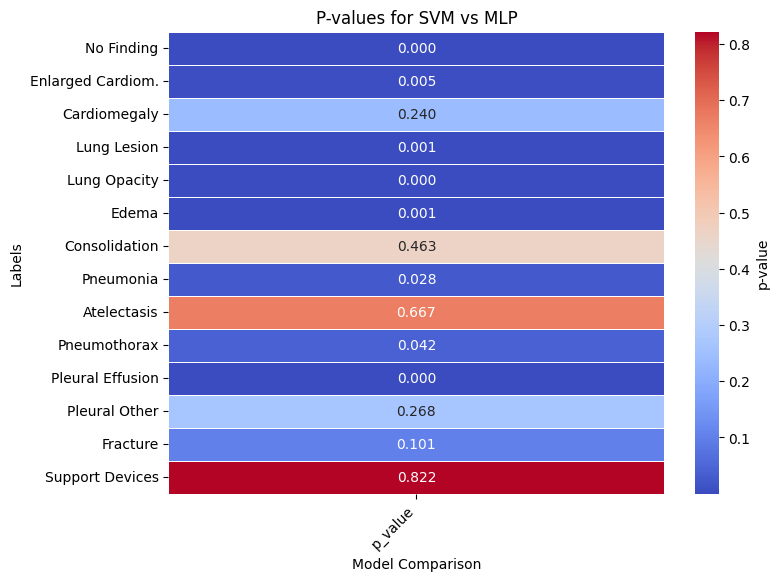

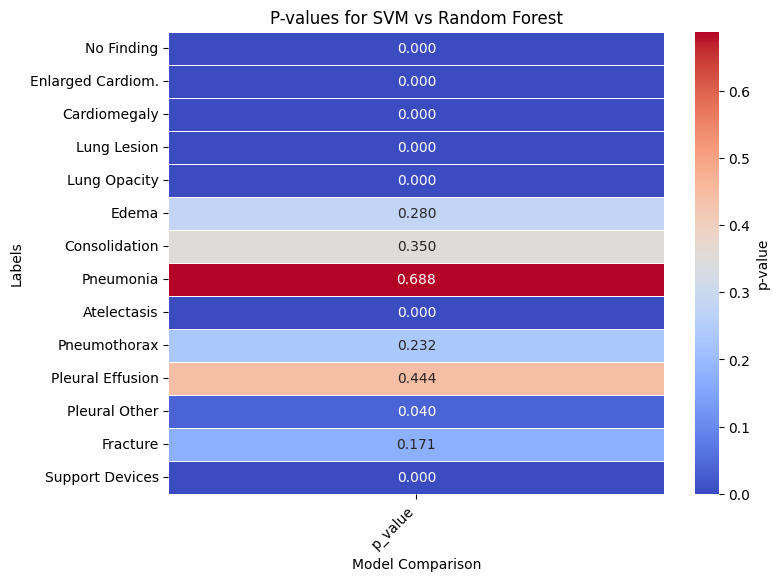

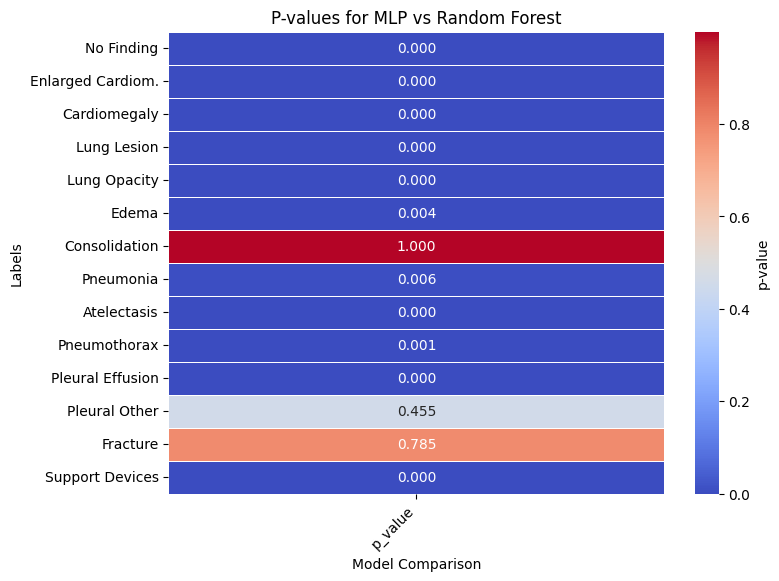

In [26]:
visualize_t_test(t_test_learning_models)

In [21]:
results_df = pd.DataFrame(multi_qa_results).T
display(results_df)

NameError: name 'multi_qa_results' is not defined

In [22]:
def t_test_table(result):
  for comparison, results in result.items():
    heatmap_data = {label: stats['p_value'] for label, stats in results.items()}
    heatmap_df = pd.DataFrame.from_dict(heatmap_data, orient='index', columns=['p_value'])
    display(HTML(f'<h2>P-values for {comparison}</h2>'))
    display(heatmap_df)
    file_name = f'p_values_{comparison.replace(" ", "_")}.xlsx'
    heatmap_df.to_excel(file_name, index=True)

In [23]:
t_test_table(t_test_learning_models)

,p_value
No Finding,0.000340
Enlarged Cardiom.,0.005122
Cardiomegaly,0.240353
Lung Lesion,0.001010
Lung Opacity,0.000112
Edema,0.001097
Consolidation,0.463085
Pneumonia,0.028405
Atelectasis,0.667006
Pneumothorax,0.041575


,p_value
No Finding,2.395113e-12
Enlarged Cardiom.,5.046767e-12
Cardiomegaly,2.278224e-11
Lung Lesion,8.447709e-13
Lung Opacity,1.472949e-13
Edema,2.801093e-01
Consolidation,3.495308e-01
Pneumonia,6.883709e-01
Atelectasis,1.245154e-13
Pneumothorax,2.321056e-01


,p_value
No Finding,4.138832e-09
Enlarged Cardiom.,1.646792e-10
Cardiomegaly,4.092648e-11
Lung Lesion,1.077833e-07
Lung Opacity,5.747274e-09
Edema,3.539445e-03
Consolidation,9.999939e-01
Pneumonia,6.308753e-03
Atelectasis,3.412427e-13
Pneumothorax,5.709585e-04


In [24]:
t_test_table(t_test_additional_learning_models)

,p_value
No Finding,3.709244e-20
Enlarged Cardiom.,7.641878e-18
Cardiomegaly,1.193292e-19
Lung Lesion,1.176011e-20
Lung Opacity,1.181432e-19
Edema,1.262719e-05
Consolidation,2.834542e-05
Pneumonia,8.000383e-05
Atelectasis,1.937642e-17
Pneumothorax,4.331704e-03


,p_value
No Finding,1.488949e-09
Enlarged Cardiom.,1.199104e-15
Cardiomegaly,1.597677e-14
Lung Lesion,4.416288e-12
Lung Opacity,5.758893e-12
Edema,NaN
Consolidation,NaN
Pneumonia,NaN
Atelectasis,1.199058e-13
Pneumothorax,NaN


,p_value
No Finding,1.060339e-18
Enlarged Cardiom.,3.862064e-16
Cardiomegaly,6.587128e-17
Lung Lesion,6.869808e-20
Lung Opacity,4.857754e-19
Edema,1.262719e-05
Consolidation,2.834542e-05
Pneumonia,8.000383e-05
Atelectasis,7.234549e-14
Pneumothorax,4.331704e-03


In [25]:
t_test_table(t_test_embedding_models)

,p_value
No Finding,6.884552e-01
Enlarged Cardiom.,5.599227e-09
Cardiomegaly,2.893516e-09
Lung Lesion,1.147645e-02
Lung Opacity,6.324140e-01
Edema,NaN
Consolidation,NaN
Pneumonia,NaN
Atelectasis,4.408941e-02
Pneumothorax,NaN


,p_value
No Finding,9.236144e-10
Enlarged Cardiom.,7.844024e-01
Cardiomegaly,1.540254e-01
Lung Lesion,1.029340e-03
Lung Opacity,2.228956e-02
Edema,3.872602e-04
Consolidation,3.416470e-03
Pneumonia,2.551923e-02
Atelectasis,9.724105e-07
Pneumothorax,1.638840e-06


,p_value
No Finding,3.085943e-10
Enlarged Cardiom.,2.195967e-04
Cardiomegaly,4.635210e-07
Lung Lesion,4.796932e-01
Lung Opacity,1.713405e-02
Edema,3.872602e-04
Consolidation,3.416470e-03
Pneumonia,2.551923e-02
Atelectasis,5.464019e-05
Pneumothorax,1.638840e-06


## Analysis of T-Tests

In [8]:
#LOADING EMBEDDING ACCURACY

embedding_results = json.load( open( "embedding_results.json" ) )

In [10]:
import numpy as np

def compute_avg_std(embedding_results, label_columns):
    avg_std_results = {}

    for model_name in embedding_results.keys():
        avg_std_results[model_name] = {}
        all_label_accuracies = []

        for label in label_columns:
            accuracies = embedding_results[model_name][label]
            
            # Compute average and standard deviation of accuracies over 20 runs for each label
            avg_accuracy = np.mean(accuracies)
            std_dev_accuracy = np.std(accuracies)

            # Store the results per label
            avg_std_results[model_name][label] = {
                'avg_accuracy': avg_accuracy,
                'std_dev_accuracy': std_dev_accuracy
            }

            # Collect all accuracies across labels for overall average and std dev
            all_label_accuracies.extend(accuracies)

        # Compute overall average and std dev across all labels
        overall_avg_accuracy = np.mean(all_label_accuracies)
        overall_std_dev_accuracy = np.std(all_label_accuracies)

        avg_std_results[model_name]['overall'] = {
            'avg_accuracy': overall_avg_accuracy,
            'std_dev_accuracy': overall_std_dev_accuracy
        }

    return avg_std_results

# Assuming you already have the 'embedding_results' and 'label_columns' from the previous code
avg_std_results = compute_avg_std(embedding_results, label_columns)

# Example of how to print the results
for model_name, label_results in avg_std_results.items():
    print(f"Model: {model_name}")
    for label, stats in label_results.items():
        if label != 'overall':
            print(f"  Label: {label} - Avg Accuracy: {stats['avg_accuracy']:.4f} +/- {stats['std_dev_accuracy']:.4f}")
    # Print overall average and std deviation
    overall_stats = label_results['overall']
    print(f"  Overall - Avg Accuracy: {overall_stats['avg_accuracy']:.4f} +/- {overall_stats['std_dev_accuracy']:.4f}")


Model: all-MiniLM-L12-v2
  Label: No Finding - Avg Accuracy: 0.8954 +/- 0.0071
  Label: Enlarged Cardiom. - Avg Accuracy: 0.9503 +/- 0.0080
  Label: Cardiomegaly - Avg Accuracy: 0.9653 +/- 0.0061
  Label: Lung Lesion - Avg Accuracy: 0.9143 +/- 0.0093
  Label: Lung Opacity - Avg Accuracy: 0.9184 +/- 0.0088
  Label: Edema - Avg Accuracy: 0.9866 +/- 0.0036
  Label: Consolidation - Avg Accuracy: 0.9928 +/- 0.0031
  Label: Pneumonia - Avg Accuracy: 0.9913 +/- 0.0029
  Label: Atelectasis - Avg Accuracy: 0.9707 +/- 0.0045
  Label: Pneumothorax - Avg Accuracy: 0.9925 +/- 0.0031
  Label: Pleural Effusion - Avg Accuracy: 0.9621 +/- 0.0077
  Label: Pleural Other - Avg Accuracy: 0.9795 +/- 0.0051
  Label: Fracture - Avg Accuracy: 0.9786 +/- 0.0041
  Label: Support Devices - Avg Accuracy: 0.9359 +/- 0.0074
  Overall - Avg Accuracy: 0.9596 +/- 0.0315
Model: multi-qa-mpnet-base-dot-v1
  Label: No Finding - Avg Accuracy: 0.8963 +/- 0.0076
  Label: Enlarged Cardiom. - Avg Accuracy: 0.9419 +/- 0.0072
  

In [11]:
#LOADING LEARNING MODEL ACCURACY

learning_model_results = json.load( open('learning_model_results.json'))

In [12]:
import numpy as np
import json

def compute_avg_std_learning_models(learning_model_results, label_columns):
    avg_std_results = {}

    for model_name in learning_model_results.keys():
        avg_std_results[model_name] = {}
        all_label_accuracies = []

        for label in label_columns:
            accuracies = learning_model_results[model_name][label]
            
            # Compute average and standard deviation of accuracies over 20 runs for each label
            avg_accuracy = np.mean(accuracies)
            std_dev_accuracy = np.std(accuracies)

            # Store the results per label
            avg_std_results[model_name][label] = {
                'avg_accuracy': avg_accuracy,
                'std_dev_accuracy': std_dev_accuracy
            }

            # Collect all accuracies across labels for overall average and std dev
            all_label_accuracies.extend(accuracies)

        # Compute overall average and std dev across all labels
        overall_avg_accuracy = np.mean(all_label_accuracies)
        overall_std_dev_accuracy = np.std(all_label_accuracies)

        avg_std_results[model_name]['overall'] = {
            'avg_accuracy': overall_avg_accuracy,
            'std_dev_accuracy': overall_std_dev_accuracy
        }

    return avg_std_results

# Assuming you already have the 'learning_model_results' and 'label_columns'
avg_std_learning_model_results = compute_avg_std_learning_models(learning_model_results, label_columns)

# Example of how to print the results
for model_name, label_results in avg_std_learning_model_results.items():
    print(f"Model: {model_name}")
    for label, stats in label_results.items():
        if label != 'overall':
            print(f"  Label: {label} - Avg Accuracy: {stats['avg_accuracy']:.4f} +/- {stats['std_dev_accuracy']:.4f}")
    # Print overall average and std deviation
    overall_stats = label_results['overall']
    print(f"  Overall - Avg Accuracy: {overall_stats['avg_accuracy']:.4f} +/- {overall_stats['std_dev_accuracy']:.4f}")


Model: SVM
  Label: No Finding - Avg Accuracy: 0.8958 +/- 0.0086
  Label: Enlarged Cardiom. - Avg Accuracy: 0.9428 +/- 0.0076
  Label: Cardiomegaly - Avg Accuracy: 0.9574 +/- 0.0055
  Label: Lung Lesion - Avg Accuracy: 0.9071 +/- 0.0066
  Label: Lung Opacity - Avg Accuracy: 0.9162 +/- 0.0078
  Label: Edema - Avg Accuracy: 0.9896 +/- 0.0031
  Label: Consolidation - Avg Accuracy: 0.9926 +/- 0.0022
  Label: Pneumonia - Avg Accuracy: 0.9898 +/- 0.0032
  Label: Atelectasis - Avg Accuracy: 0.9686 +/- 0.0075
  Label: Pneumothorax - Avg Accuracy: 0.9926 +/- 0.0020
  Label: Pleural Effusion - Avg Accuracy: 0.9617 +/- 0.0092
  Label: Pleural Other - Avg Accuracy: 0.9791 +/- 0.0034
  Label: Fracture - Avg Accuracy: 0.9753 +/- 0.0051
  Label: Support Devices - Avg Accuracy: 0.9364 +/- 0.0088
  Overall - Avg Accuracy: 0.9575 +/- 0.0324
Model: MLP
  Label: No Finding - Avg Accuracy: 0.8846 +/- 0.0157
  Label: Enlarged Cardiom. - Avg Accuracy: 0.9358 +/- 0.0103
  Label: Cardiomegaly - Avg Accuracy: 0

# Coreset

In [ ]:

# Dummy function to simulate embeddings
def MedcrunchR_embedding(file_path, report_column, model_name):
    return np.random.rand(10000, 768)  # Assuming 10,000 samples and 768-dim embeddings

# Create coresets using k-means++ initialization
def kmeans_plus_plus_coreset(X, coreset_size):
    from sklearn.metrics import pairwise_distances_argmin_min
    n_samples, _ = X.shape
    coreset_indices = []
    first_index = np.random.randint(0, n_samples)
    coreset_indices.append(first_index)
    for _ in range(1, coreset_size):
        _, min_distances = pairwise_distances_argmin_min(X, X[coreset_indices])
        probs = min_distances / min_distances.sum()
        next_index = np.random.choice(n_samples, p=probs)
        coreset_indices.append(next_index)
    return X[coreset_indices]

# Load your dataset and generate embeddings
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
model_name = "example-model"
X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)

# Define label columns
label_columns = ['No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity', 'Edema', 
                 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
                 'Pleural Other', 'Fracture', 'Support Devices']
df = pd.read_csv(file_path)
y_labels = df[label_columns]

# Function to evaluate model performance on a coreset
def evaluate_model_on_coreset(X_coreset, y_coreset):
    svm_results = {label: [] for label in label_columns}
    X_train, X_test, y_train, y_test = train_test_split(X_coreset, y_coreset, test_size=0.2, random_state=39)
    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values
        model = SVC(kernel='linear', C=1.0, random_state=30)
        model.fit(X_train, y_train_single_label)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_single_label, y_pred)
        svm_results[column].append(accuracy)
    return svm_results

# Evaluate different coreset sizes
coreset_sizes = [100, 500, 1000, 2000, 5000]
performance = []
for size in coreset_sizes:
    X_coreset = kmeans_plus_plus_coreset(X_embeddings, size)
    y_coreset = y_labels.sample(n=size, random_state=42)
    results = evaluate_model_on_coreset(X_coreset, y_coreset)
    avg_accuracy = np.mean([np.mean(acc) for acc in results.values()])
    performance.append(avg_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(coreset_sizes, performance, marker='o')
plt.title('Model Performance vs Coreset Size')
plt.xlabel('Coreset Size')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min


In [14]:
def kmeans_coreset(X, coreset_size):
    n_samples, _ = X.shape
    coreset_indices = []
    first_index = np.random.randint(0, n_samples)
    coreset_indices.append(first_index)
    for _ in range(1, coreset_size):
        _, min_distances = pairwise_distances_argmin_min(X, X[coreset_indices])
        probs = min_distances / min_distances.sum()
        next_index = np.random.choice(n_samples, p=probs)
        coreset_indices.append(next_index)
    return X[coreset_indices]


In [9]:
file_path = "IU-GroundTruth.csv"
report_column = 'REPORT'
label_column = 'No Finding'
model_name="all-MiniLM-L12-v2"
label_columns = ['No Finding','Enlarged Cardiom.','Cardiomegaly','Lung Lesion','Lung Opacity','Edema','Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']
df = pd.read_csv(file_path)
y_labels = df[label_columns]

In [15]:
X_embeddings = MedcrunchR_embedding(file_path, report_column, model_name)

In [21]:
def evaluate_model_on_coreset(X_coreset, y_coreset, label_columns):
    results = SVM_function(X_coreset, y_coreset, label_columns)
    avg_accuracy = np.mean([result['accuracy'] for result in results.values()])
    return avg_accuracy


In [24]:
def SVM_function(X, y, label_columns):
    kernel = 'linear'
    C = 1.0

    svm_results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

    for column in label_columns:
        y_train_single_label = y_train[column].values
        y_test_single_label = y_test[column].values

        # Check if the training data contains more than one class
        if len(np.unique(y_train_single_label)) > 1:
            # DEFINE MODEL
            model = SVC(kernel=kernel, C=C, random_state=30)

            # TRAIN MODEL
            model.fit(X_train, y_train_single_label)

            # EVALUATION
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test_single_label, y_pred)

            svm_results[column] = {'accuracy': accuracy, 'model': model}
            print(f"Label: {column}, Accuracy: {accuracy}")
        else:
            print(f"Label: {column} has only one class in training data, skipping.")
            svm_results[column] = {'accuracy': None, 'model': None}

    return svm_results

In [25]:
coreset_sizes = [100, 500, 1000, 2000, 5000]
performance = []
for size in coreset_sizes:
    X_coreset = kmeans_plus_plus_coreset(X_embeddings, size)
    y_coreset = y_labels.sample(n=size, random_state=42)
    avg_accuracy = evaluate_model_on_coreset(X_coreset, y_coreset, label_columns)
    performance.append(avg_accuracy)

Label: No Finding, Accuracy: 0.5
Label: Enlarged Cardiom., Accuracy: 0.9
Label: Cardiomegaly, Accuracy: 0.9
Label: Lung Lesion, Accuracy: 0.75
Label: Lung Opacity, Accuracy: 0.75
Label: Edema has only one class in training data, skipping.
Label: Consolidation, Accuracy: 1.0
Label: Pneumonia has only one class in training data, skipping.
Label: Atelectasis, Accuracy: 0.95
Label: Pneumothorax, Accuracy: 1.0
Label: Pleural Effusion, Accuracy: 1.0
Label: Pleural Other, Accuracy: 0.95
Label: Fracture, Accuracy: 0.95
Label: Support Devices, Accuracy: 0.95


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(coreset_sizes, performance, marker='o')
plt.title('Model Performance vs Coreset Size')
plt.xlabel('Coreset Size')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()